# Ranking Features of a Smartphone

### Dataset information

 - battery_power - Total energy a battery can store in one time measured in mAh
 - blue - Has bluetooth (1) or not (0)
 - clock_speed - speed at which microprocessor executes instructions
 - dual_sim - Has dual sim support (1) or not (0)
 - fc - Front Camera mega pixels
 - four_g - Has 4G (1) or not (0)
 - int_memory - Internal Memory in Gigabytes
 - m_dep - Mobile Depth in cm
 - mobile_wt - Weight of mobile phone
 - n_cores - Number of cores of processor
 - pc - Primary Camera mega pixels
 - px_height - Pixel Resolution Height
 - px_width - Pixel Resolution Width
 - ram - Random Access Memory in Mega Bytes
 - sc_h - Screen Height of mobile in cm
 - sc_w - Screen Width of mobile in cm
 - talk_time - longest time that a single battery charge will last
 - three_g - Has 3G (1) or not (0)
 - touch_screen - Has touch screen (1) or not (0)
 - wifi - Has wifi (1) or not (0)
 - price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
train = pd.read_csv(r"C:\Users\jubie\Downloads\MobileTrain.csv")
test = pd.read_csv(r"C:\Users\jubie\Downloads\MobileTest.csv")

In [3]:
## Descriptive Statistics

In [4]:
#Displaying first 5 rows of the train dataset
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#Displaying last 5 rows of the train dataset
train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
train.shape

(2000, 21)

## Basic details of the train dataset

In [7]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
# basic information
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# Number of unique values in each feature
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [11]:
#Checking for null values
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
#descriptive statistics
round(train.describe(),1).T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
blue,2000.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
dual_sim,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
four_g,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
n_cores,2000.0,4.5,2.3,1.0,3.0,4.0,7.0,8.0


In [13]:
def understand_data(train) :
    
    return(pd.DataFrame({"Datatype":train.dtypes,
                         "No of null values":train.isna().sum(),
                         "No of unique values":train.nunique(axis=0,dropna=True),
                         "Unique values": train.apply(lambda x: str(x.unique()),axis=0)}))
understand_data(train)

,Datatype,No of null values,No of unique values,Unique values
battery_power,int64,0,1094,[ 842 1021 563 ... 1139 1467 858]
blue,int64,0,2,[0 1]
clock_speed,float64,0,26,[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1. 0.9 1...
dual_sim,int64,0,2,[0 1]
fc,int64,0,20,[ 1 0 2 13 3 4 5 7 11 12 16 6 15 8 9 ...
four_g,int64,0,2,[0 1]
int_memory,int64,0,63,[ 7 53 41 10 44 22 24 9 33 17 52 46 13 23 49 ...
m_dep,float64,0,10,[0.6 0.7 0.9 0.8 0.1 0.5 1. 0.3 0.4 0.2]
mobile_wt,int64,0,121,[188 136 145 131 141 164 139 187 174 93 182 1...
n_cores,int64,0,8,[2 3 5 6 1 8 4 7]


##### Numerical Variables and Categorical Variables
 - We have 13 numerical features and 7 categorical features. But all the categorical variables are encoded.
 - Numerical features - battery_power, clock_speed, fc , int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, sc_h, sc_h, sc_w, talk_time
 - Categorical features- blue, dual_sim, four_g, three_g , touch_screen, wifi, price_range

In [14]:
#Checking for duplicate rows
train.duplicated().sum()

0

# Exploratory Data Analysis

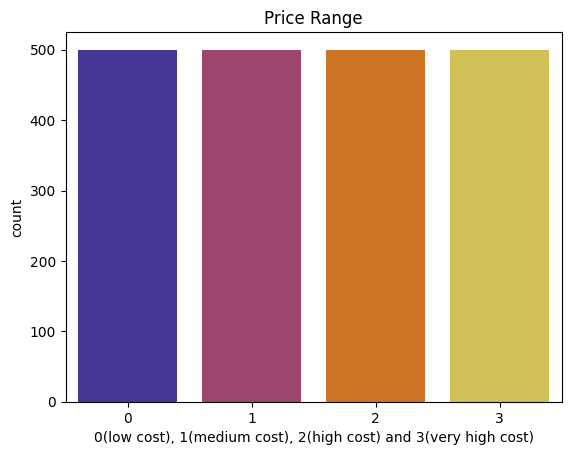

In [15]:
# Count plot for Price range
sns.countplot(x='price_range',data=train, palette='CMRmap')
plt.title("Price Range")
plt.xlabel('0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)')
plt.show() 

 -  The dataset is balanced

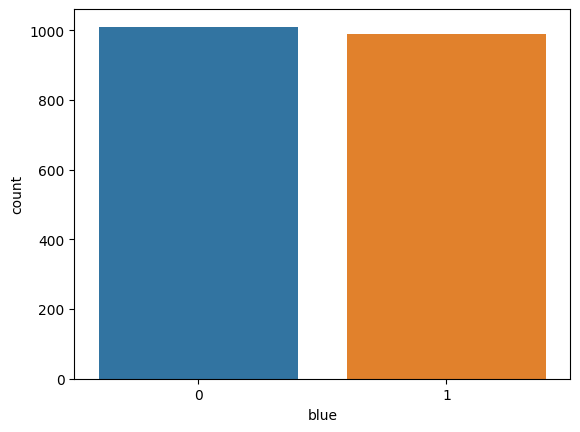

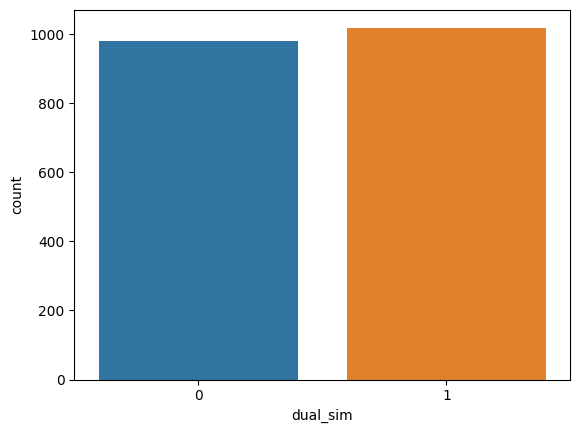

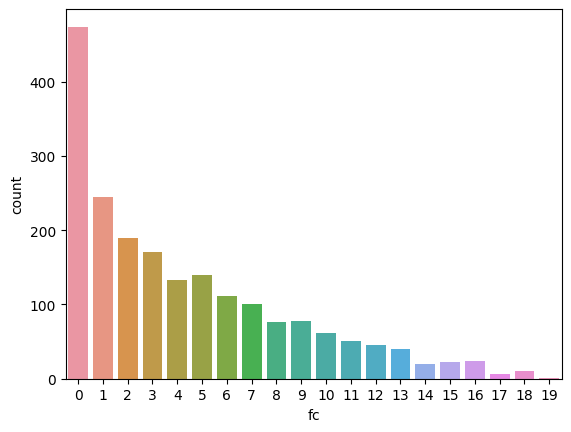

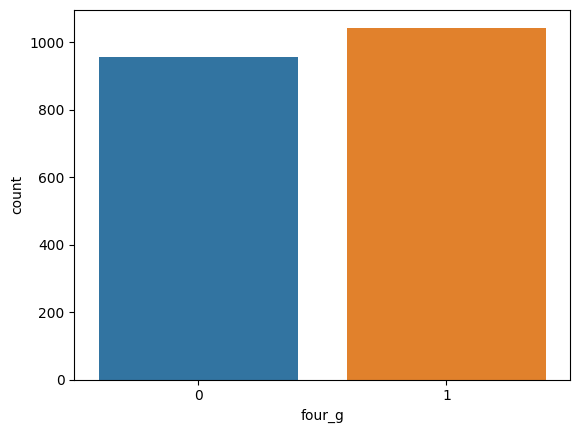

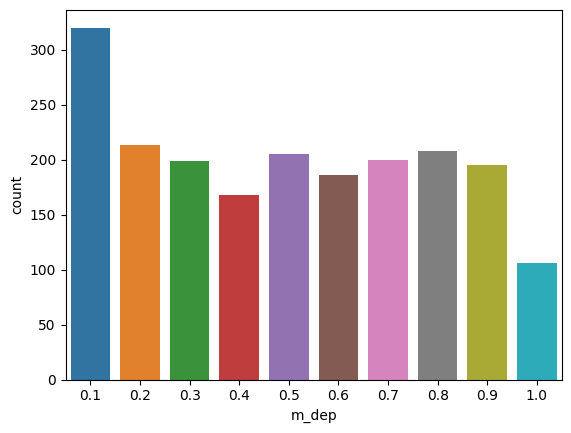

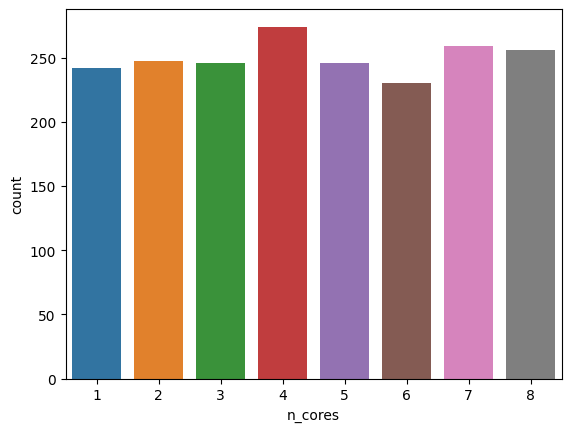

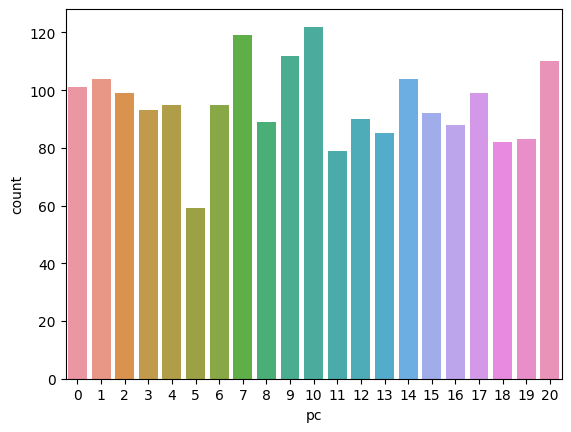

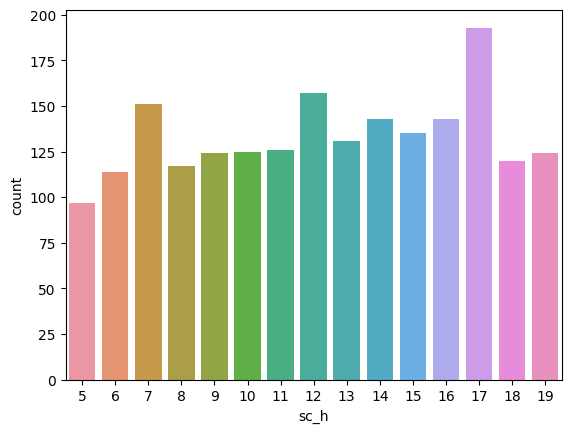

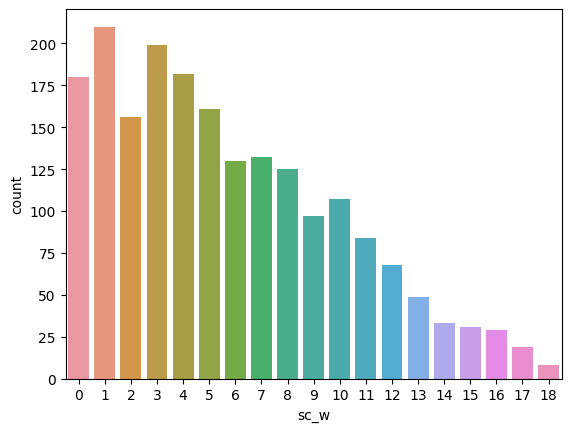

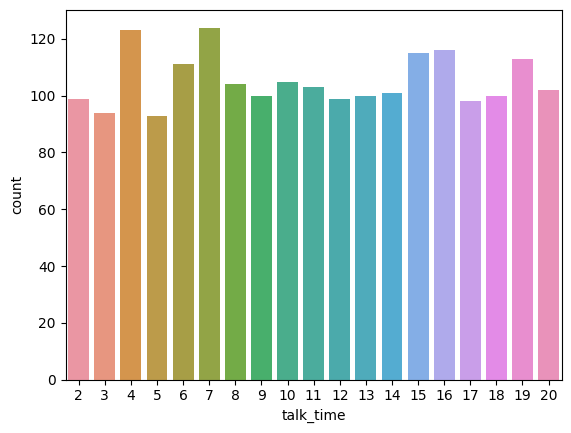

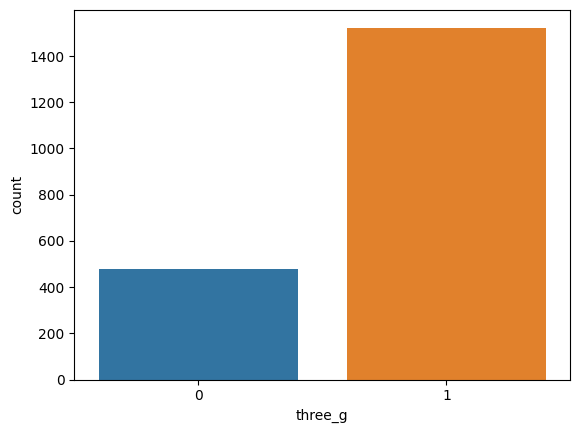

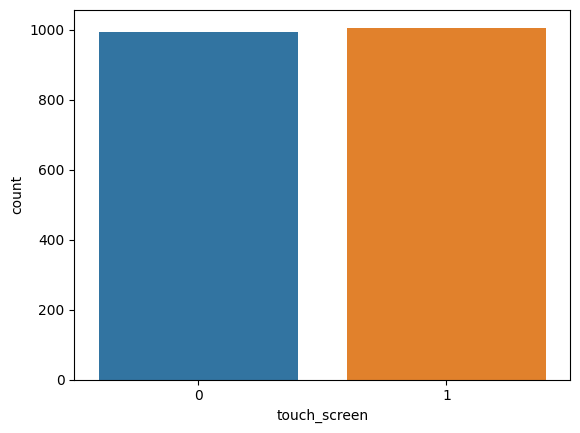

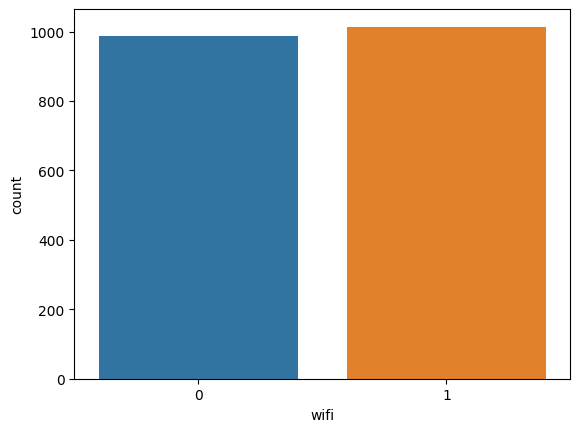

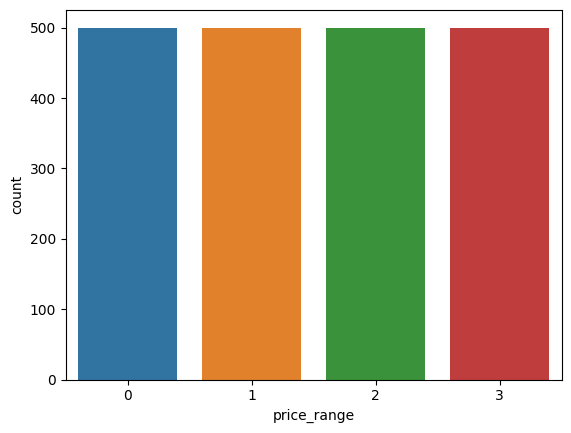

In [16]:
#Countplot for various columns in the dataset
for i in train:
    if (train[i].nunique())<=25:
        sns.countplot(x=train[i])
        plt.show()

* Majority of phones in this dataset have a front camera. Only a quarter of the phone in this dataset doesn't have front camera.
* Almost 6 % of phones in this dataset doens't have camera.
* Talktime is evenly spread out.

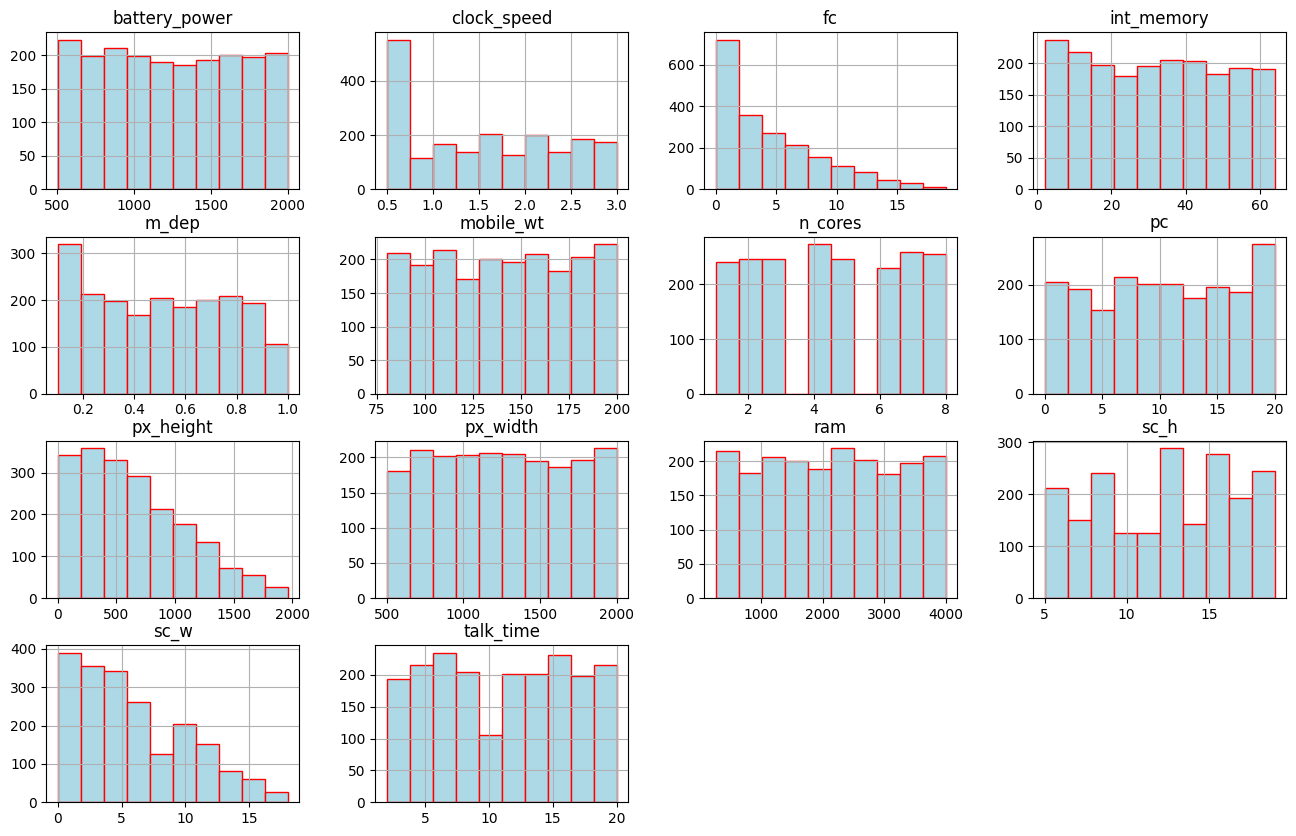

In [17]:
#Plotting histogram to understand more about numerical features
num_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
train.hist(num_col,figsize=(16,10), color = "lightblue", ec="red")
plt.show()

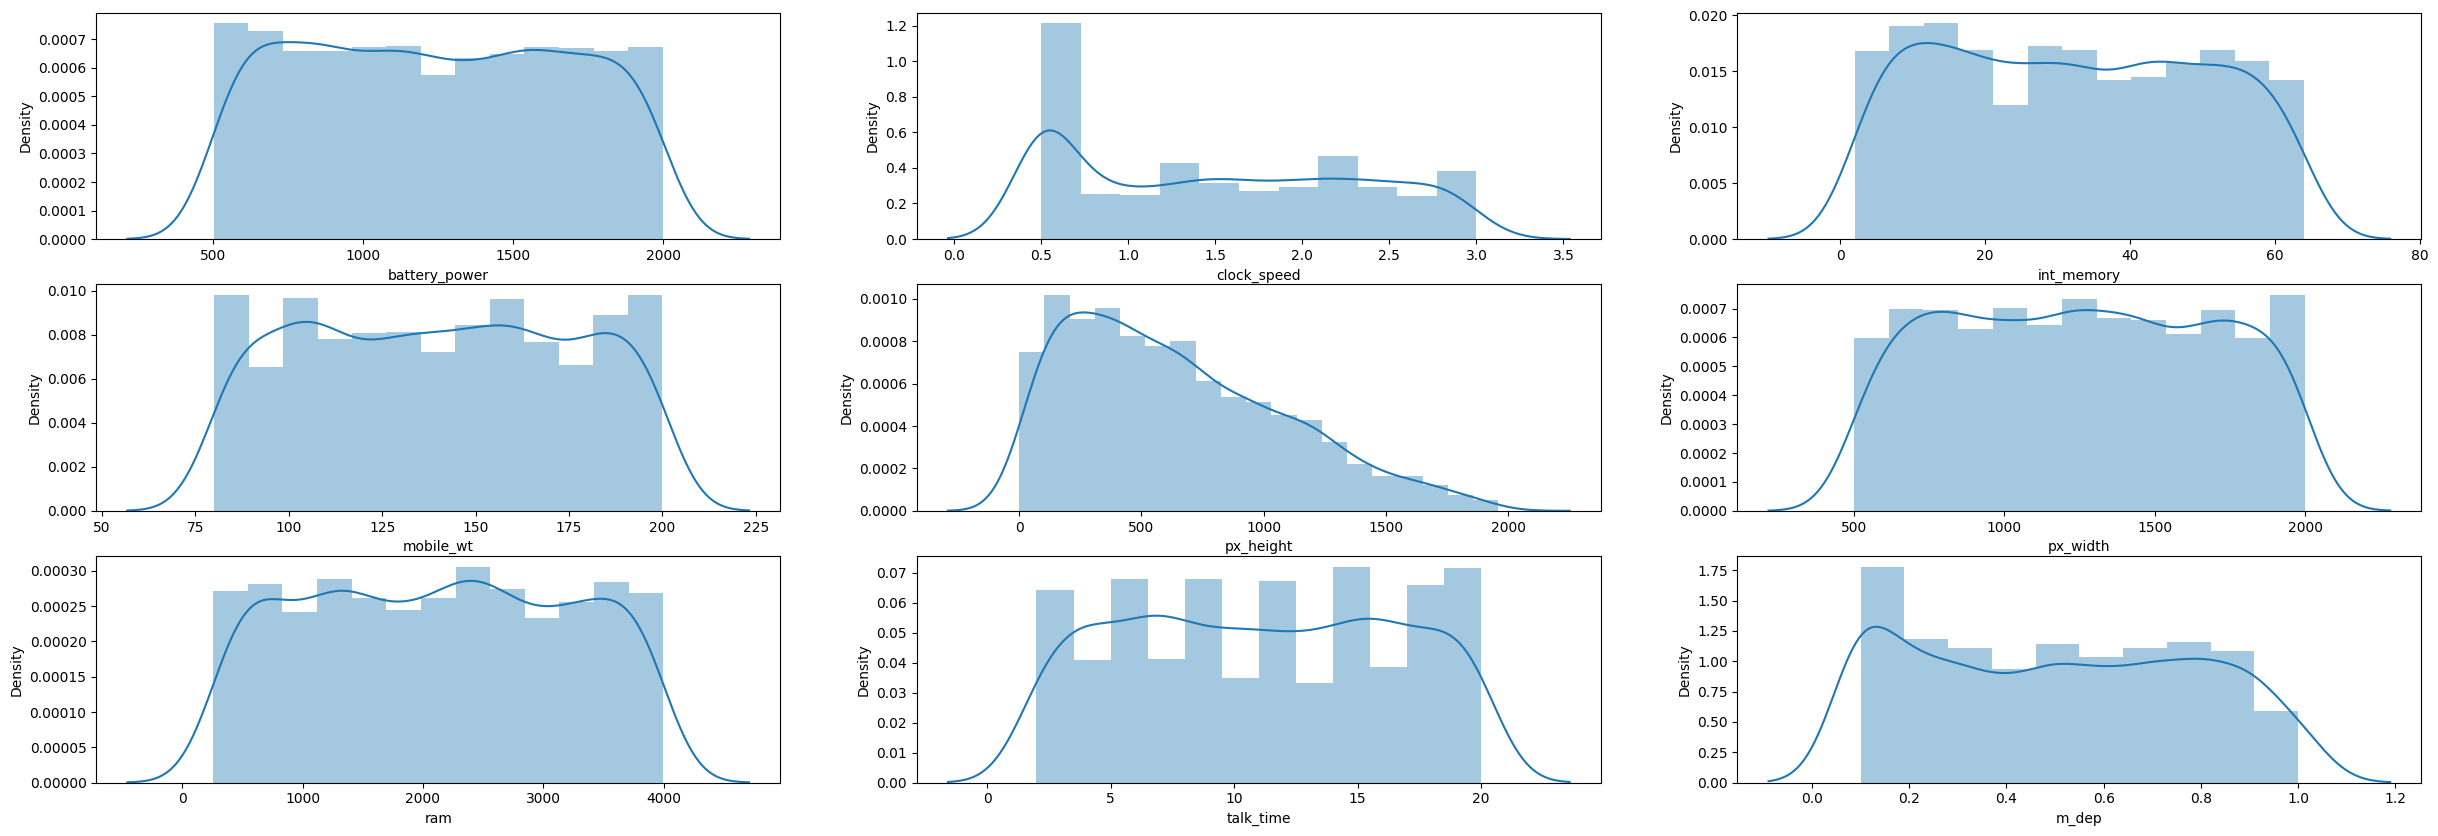

In [18]:
#distplot on various columns of the dataset
plt.figure(figsize=(30,10))
plt.subplot(331)
sns.distplot(train["battery_power"])

plt.subplot(332)
sns.distplot(train["clock_speed"])

plt.subplot(333)
sns.distplot(train["int_memory"])

plt.subplot(334)
sns.distplot(train["mobile_wt"])

plt.subplot(335)
sns.distplot(train["px_height"])

plt.subplot(336)
sns.distplot(train["px_width"])

plt.subplot(337)
sns.distplot(train["ram"])

plt.subplot(338)
sns.distplot(train["talk_time"])

plt.subplot(339)
sns.distplot(train["m_dep"])

plt.show()

Distribution of  battery_power with respect to price range


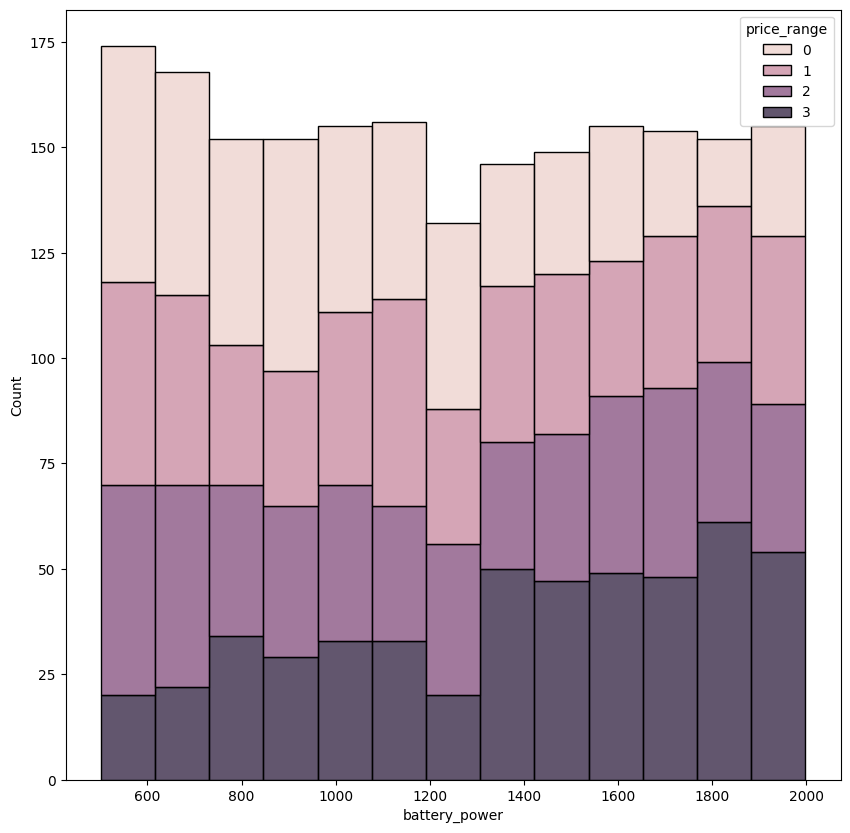

Distribution of  blue with respect to price range


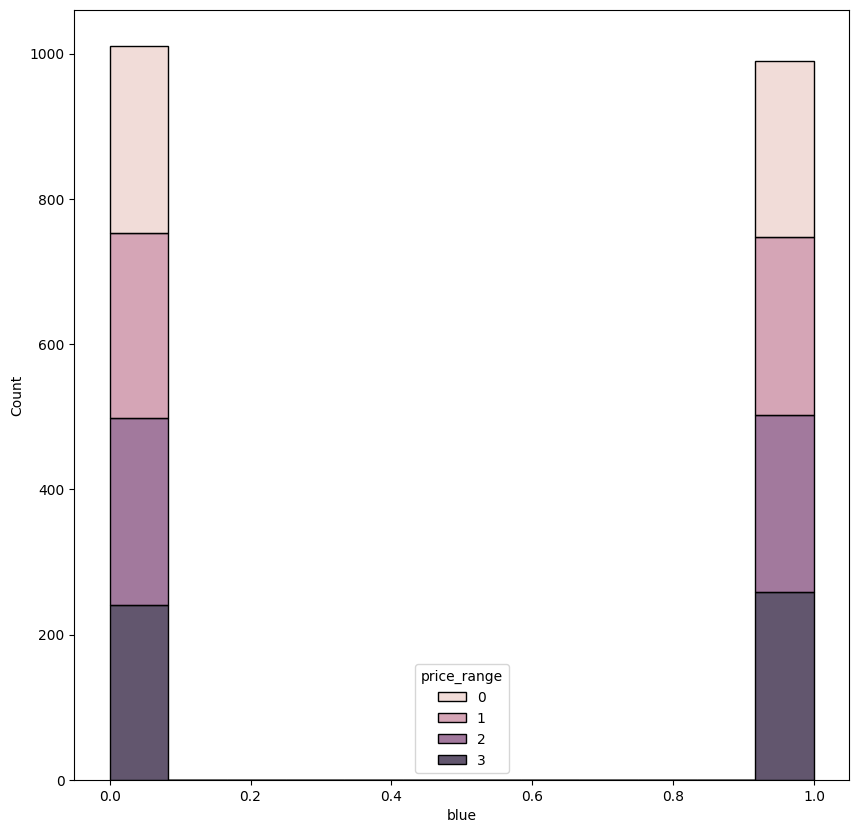

Distribution of  clock_speed with respect to price range


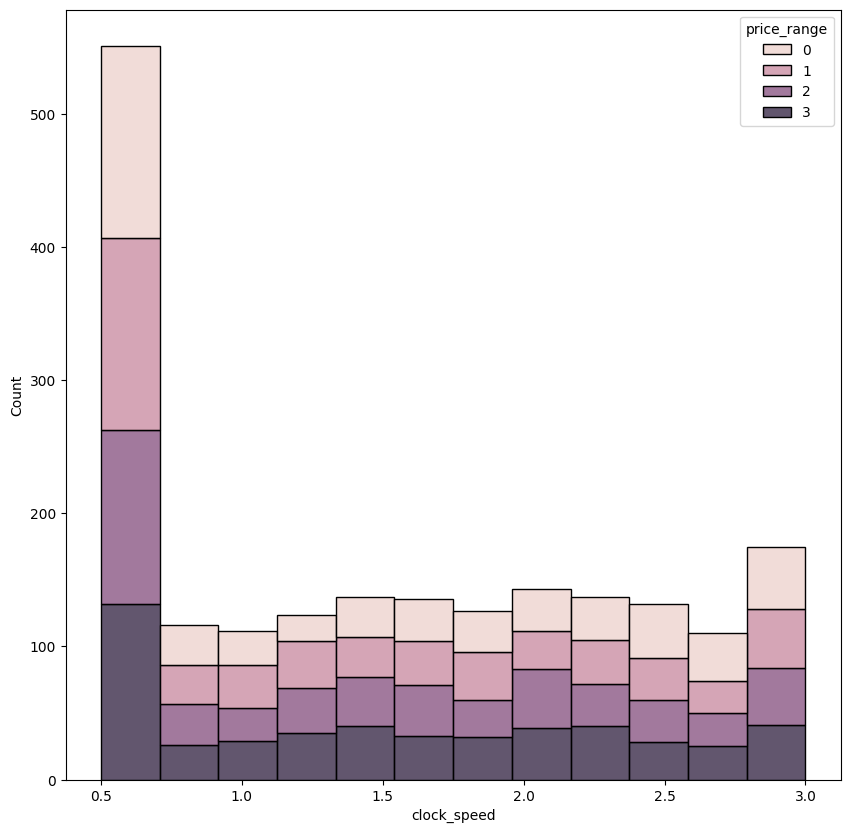

Distribution of  dual_sim with respect to price range


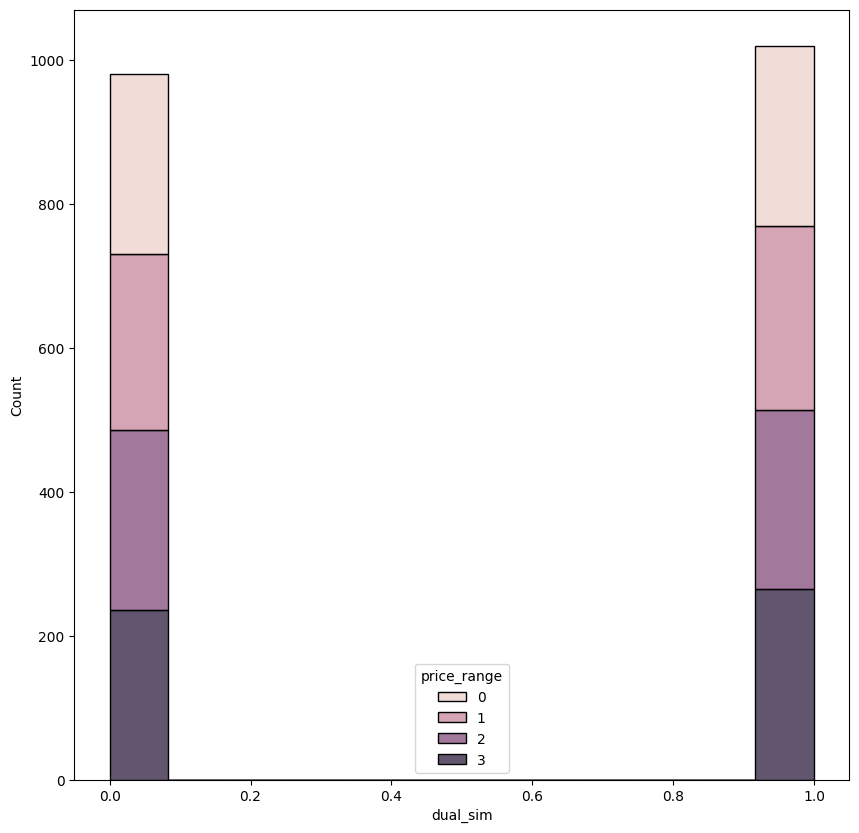

Distribution of  fc with respect to price range


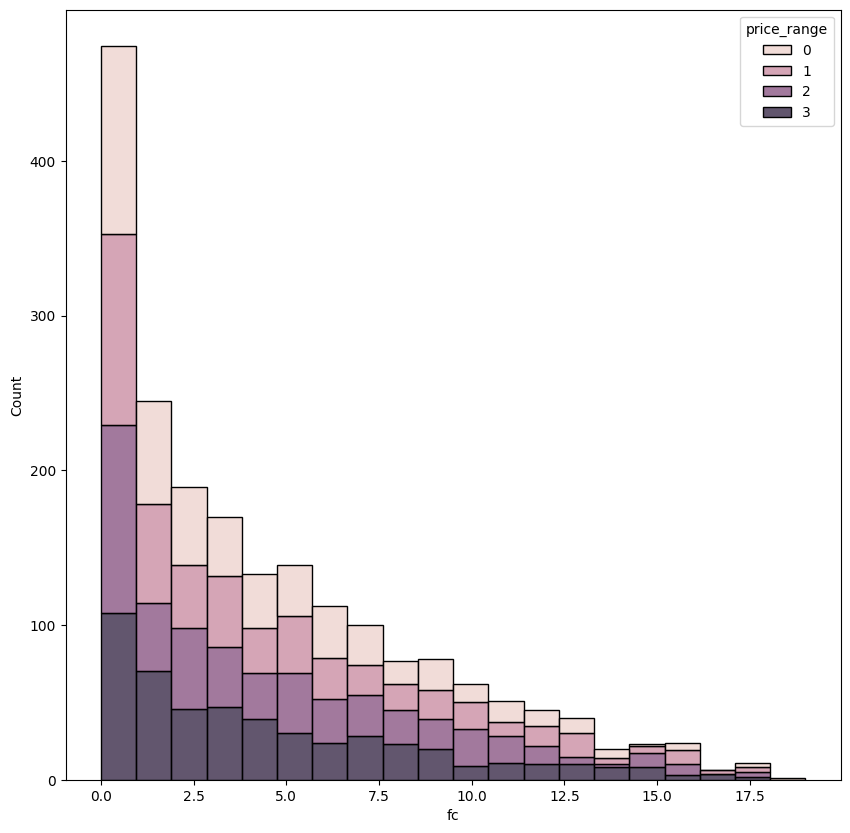

Distribution of  four_g with respect to price range


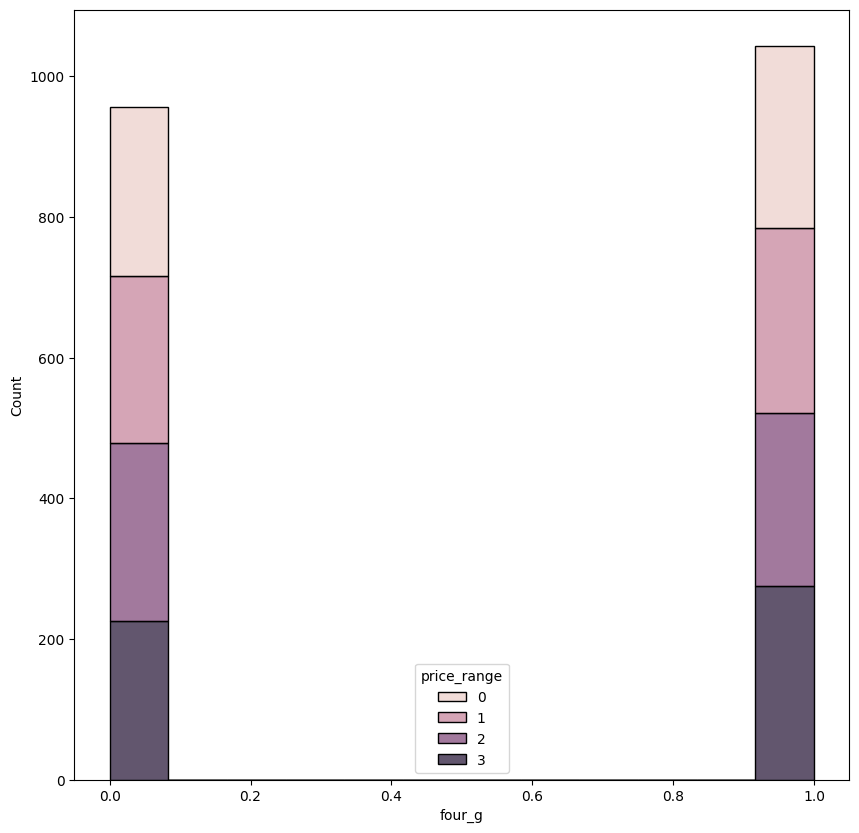

Distribution of  int_memory with respect to price range


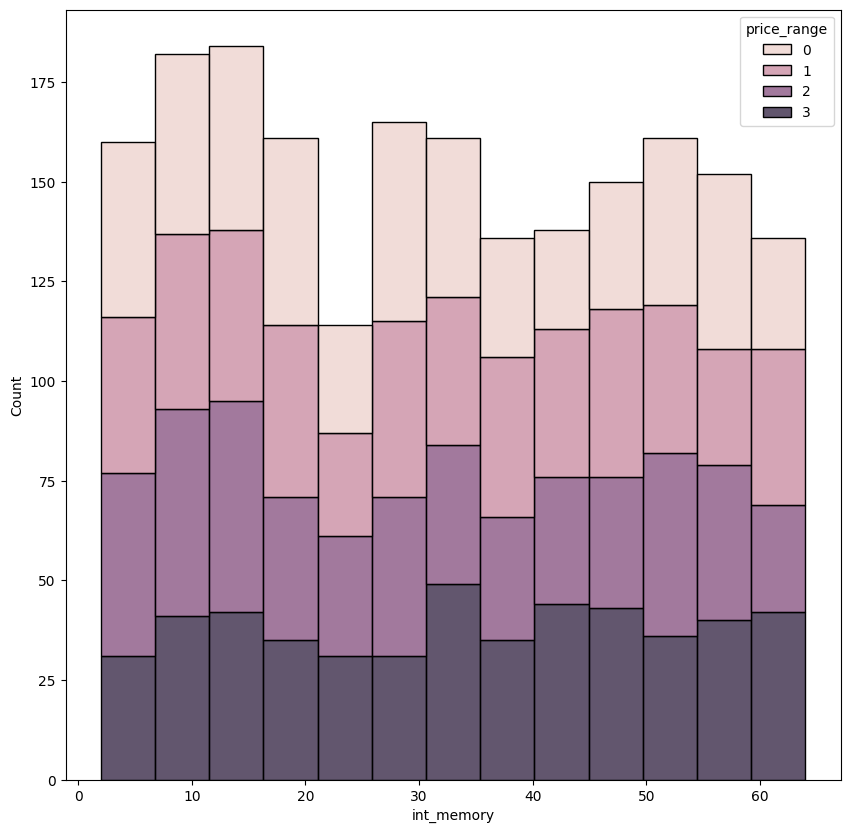

Distribution of  m_dep with respect to price range


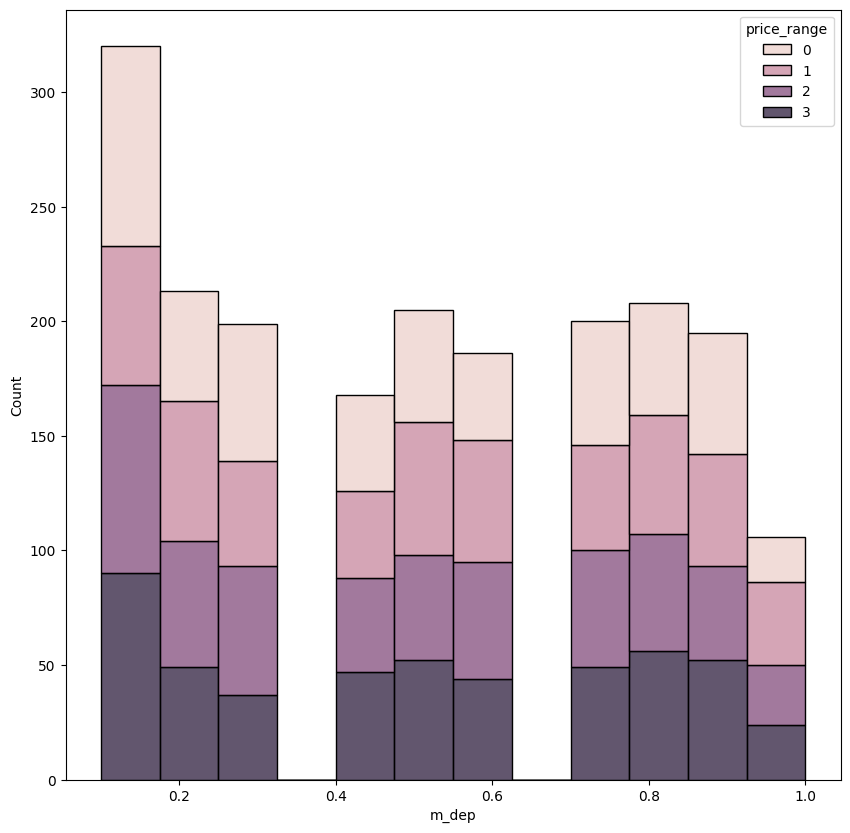

Distribution of  mobile_wt with respect to price range


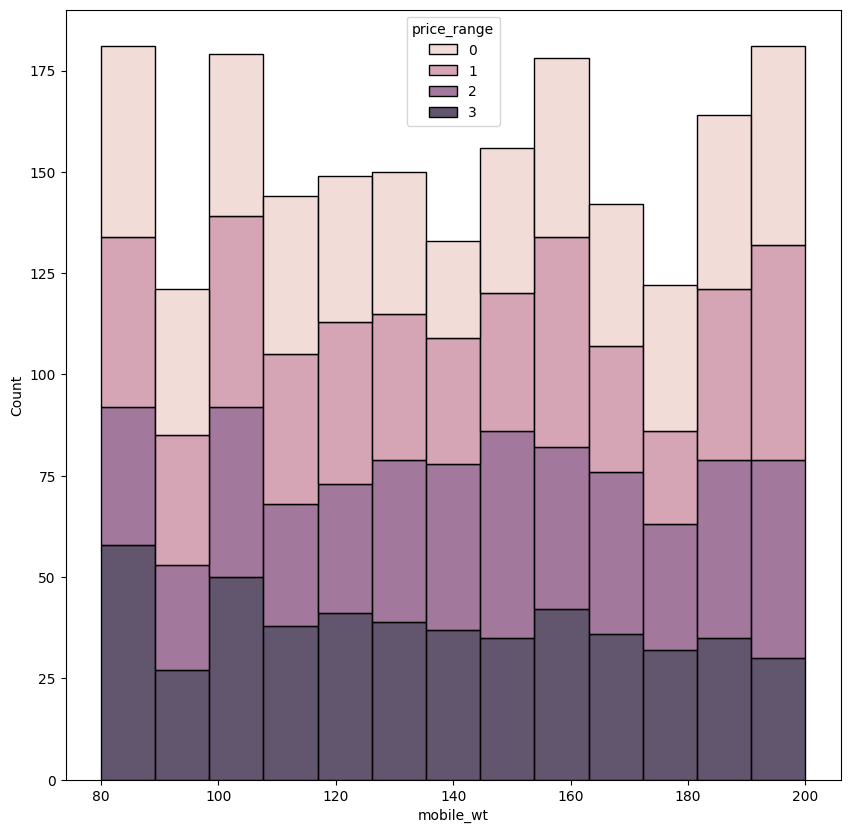

Distribution of  n_cores with respect to price range


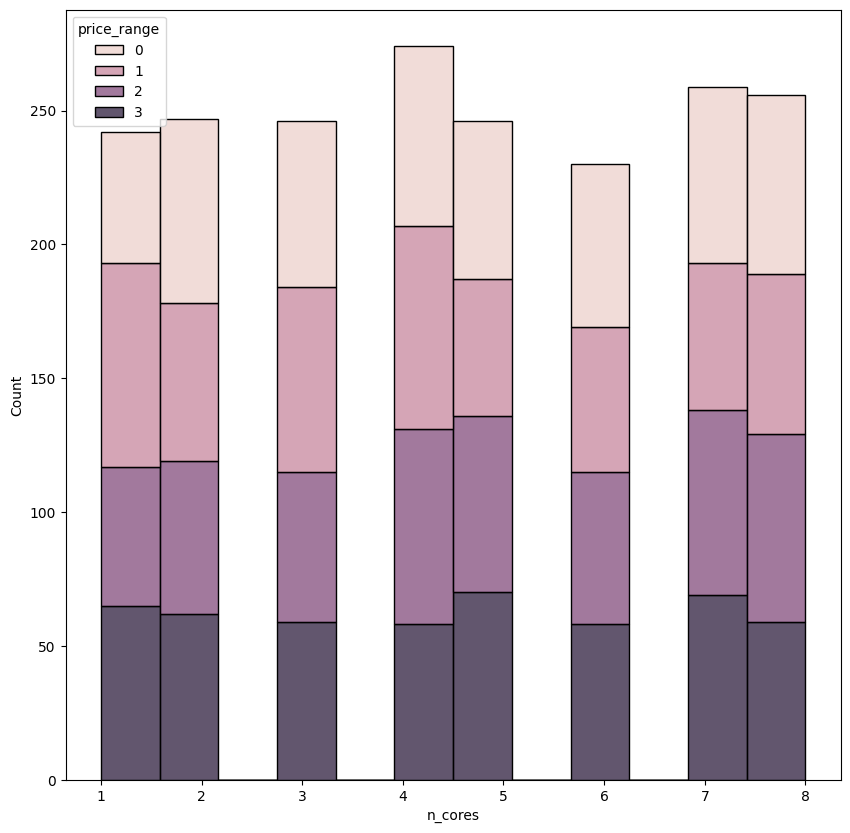

Distribution of  pc with respect to price range


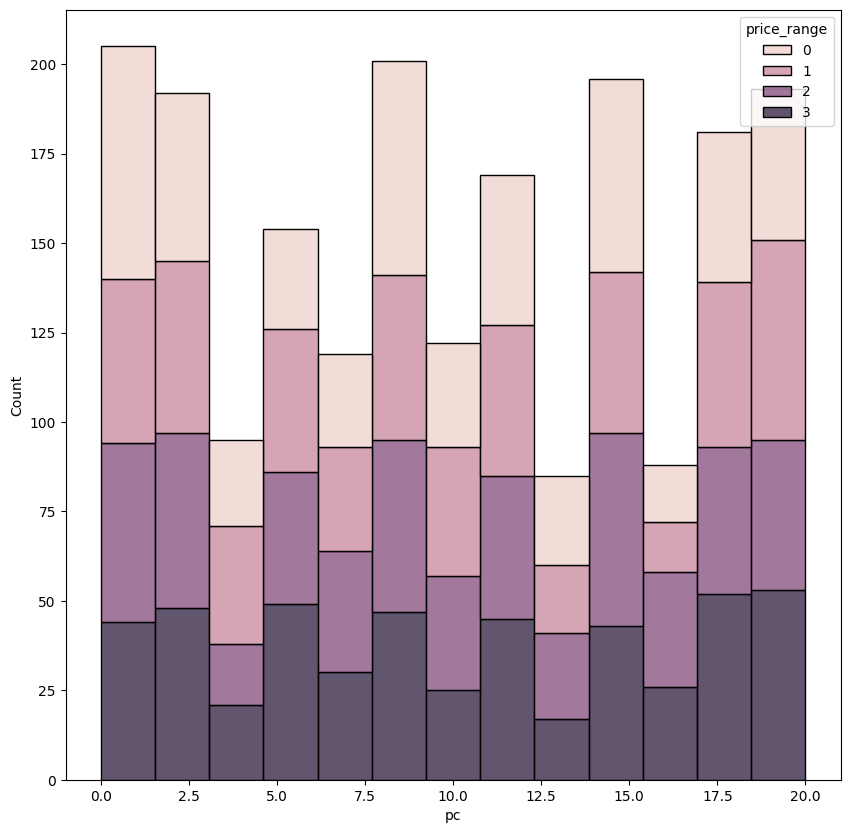

Distribution of  px_height with respect to price range


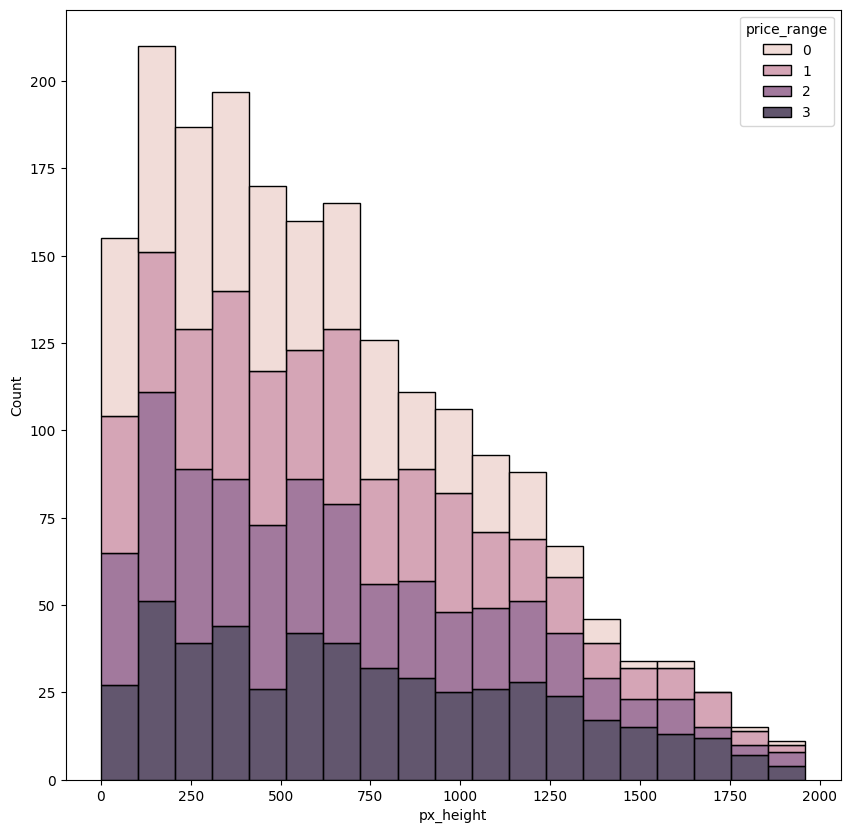

Distribution of  px_width with respect to price range


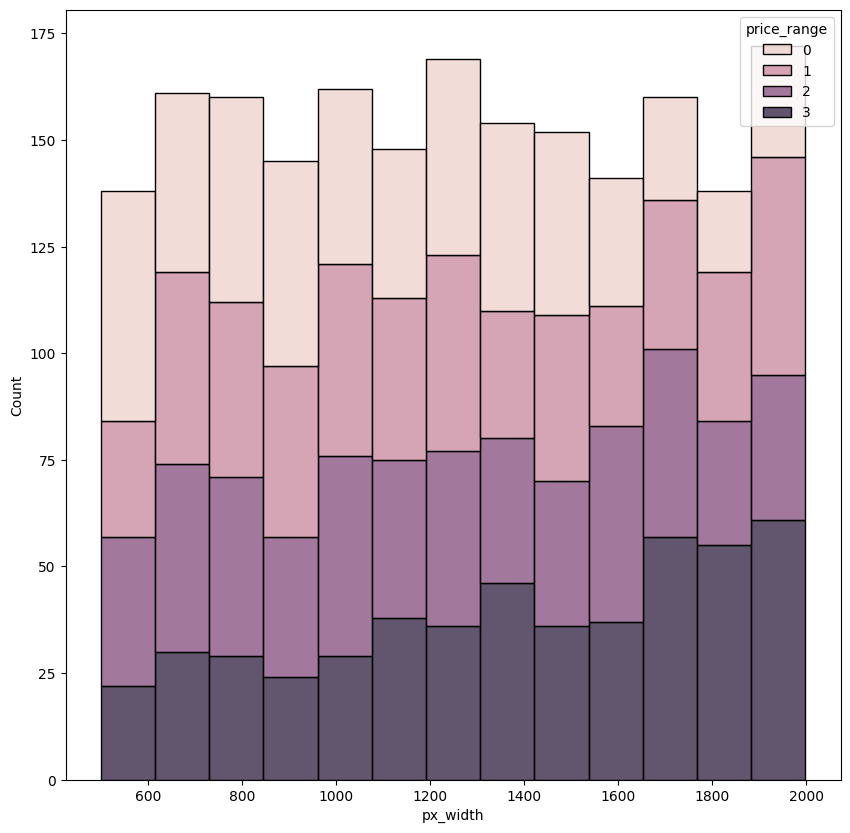

Distribution of  ram with respect to price range


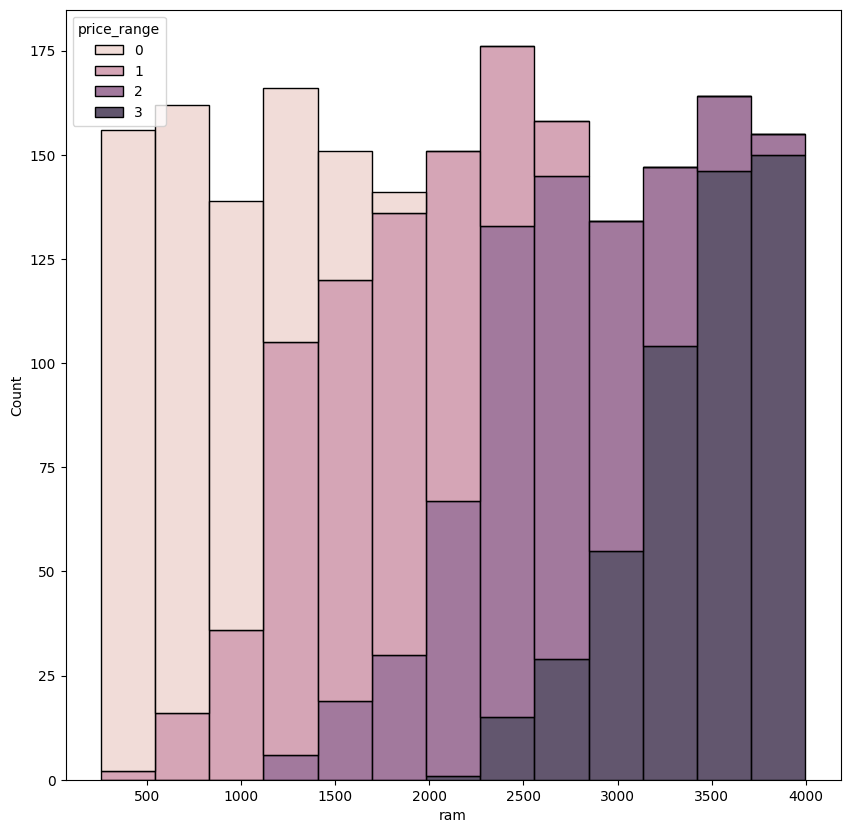

Distribution of  sc_h with respect to price range


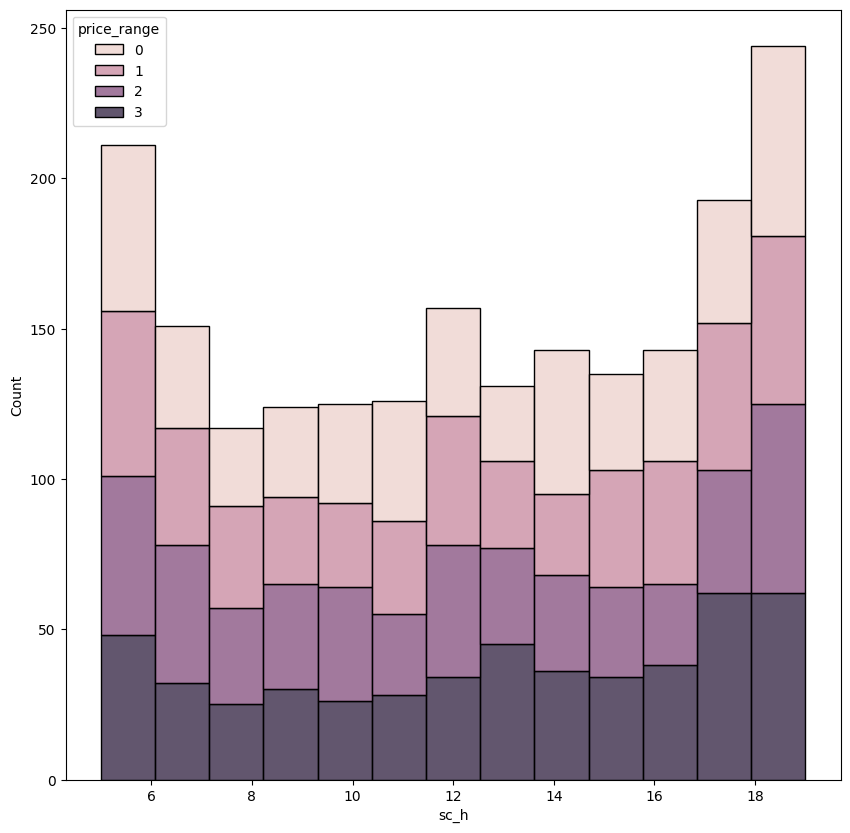

Distribution of  sc_w with respect to price range


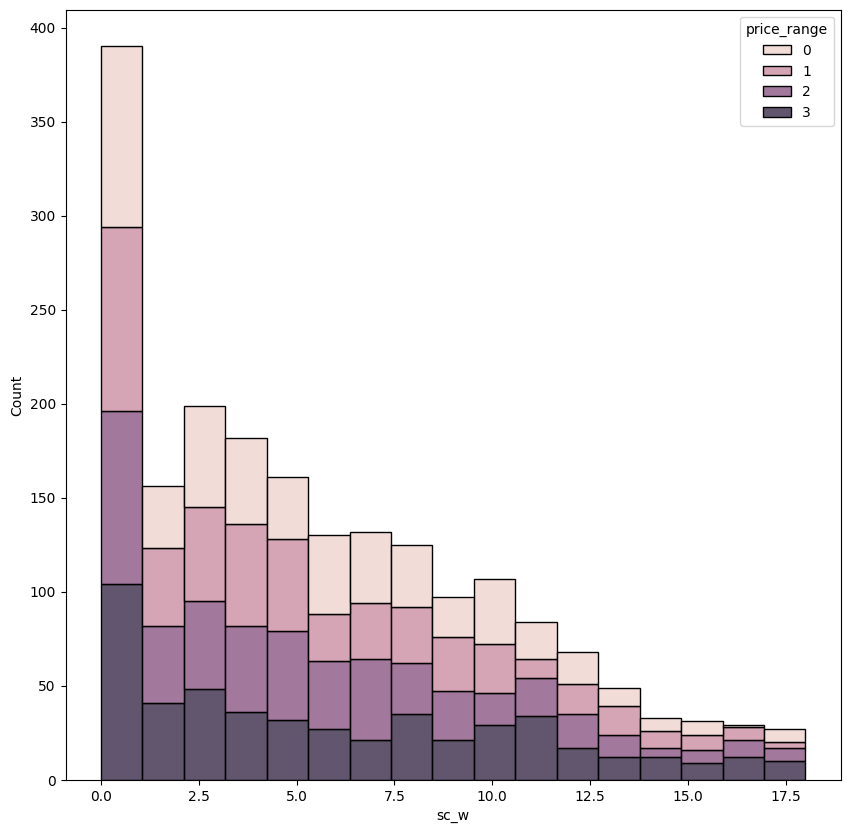

Distribution of  talk_time with respect to price range


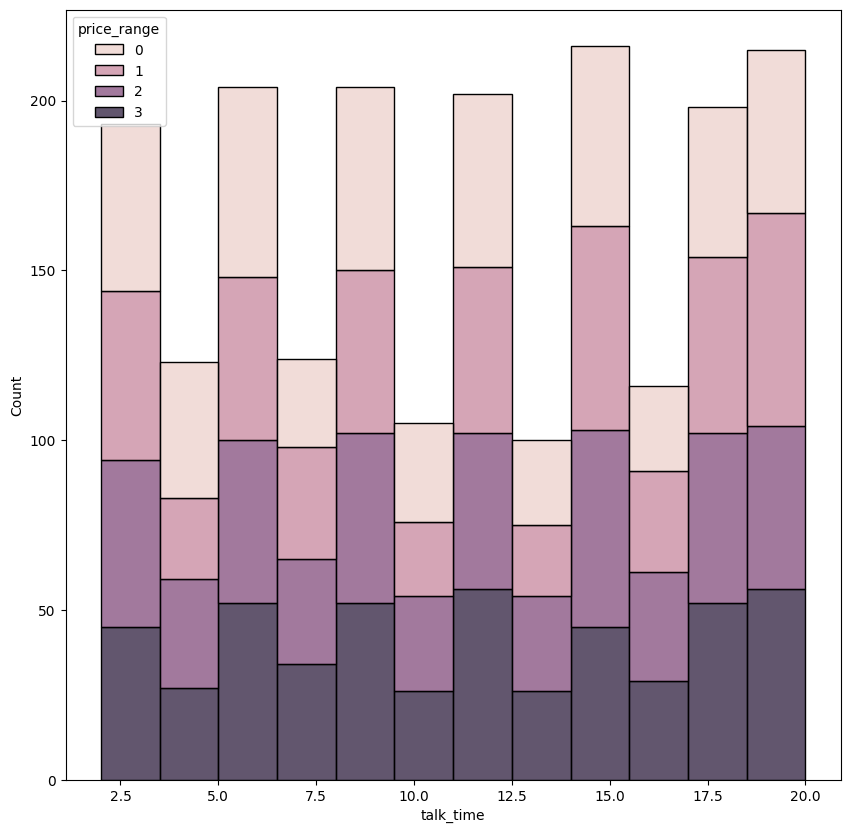

Distribution of  three_g with respect to price range


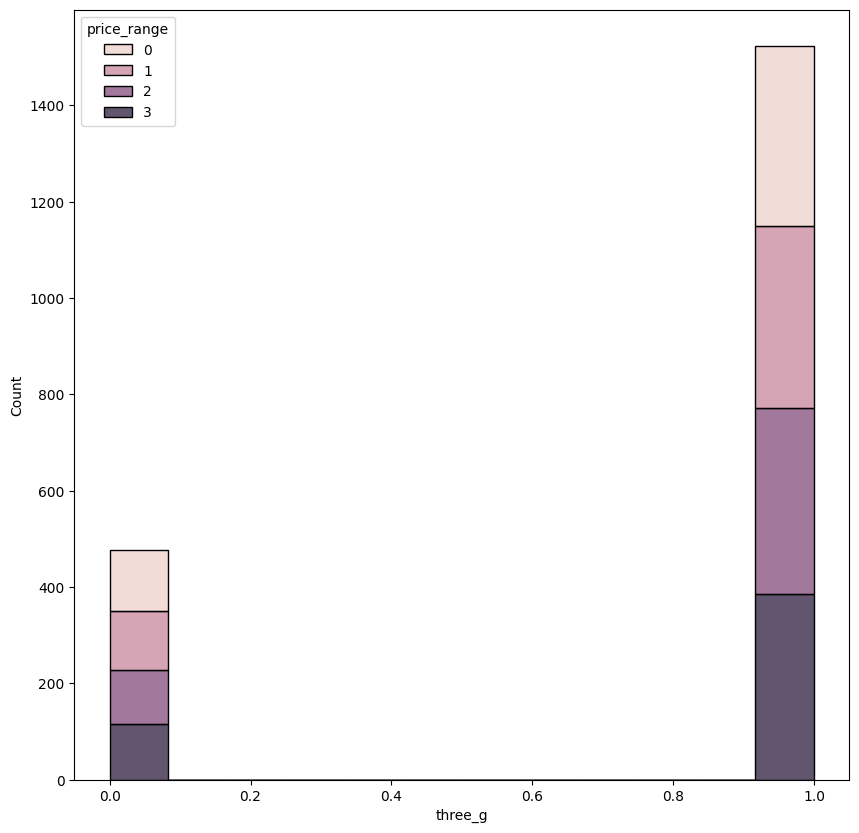

Distribution of  touch_screen with respect to price range


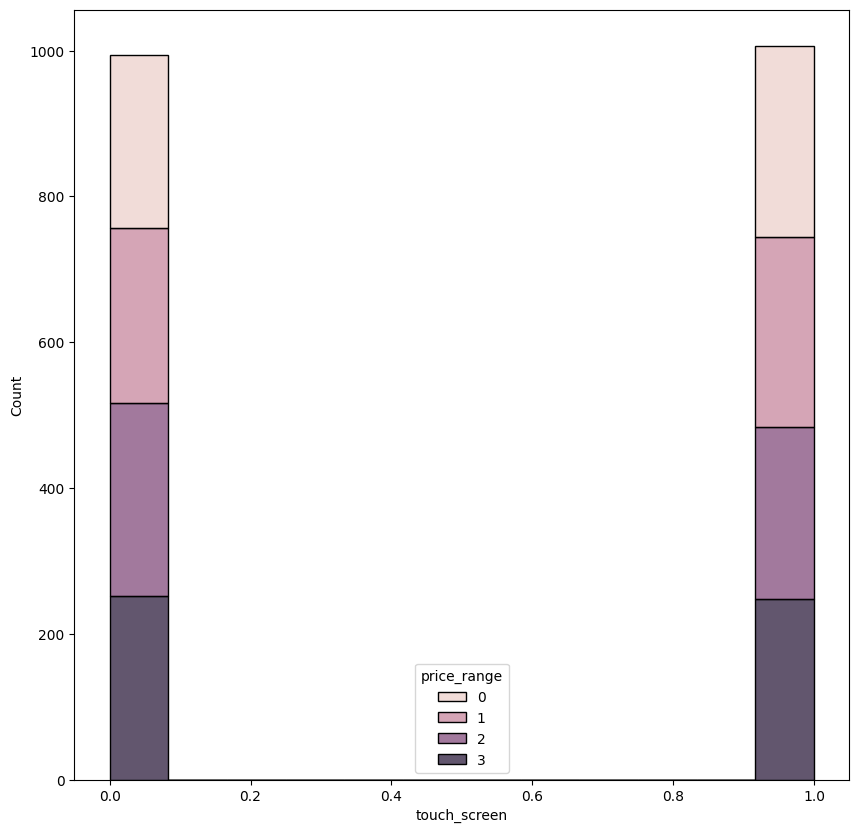

Distribution of  wifi with respect to price range


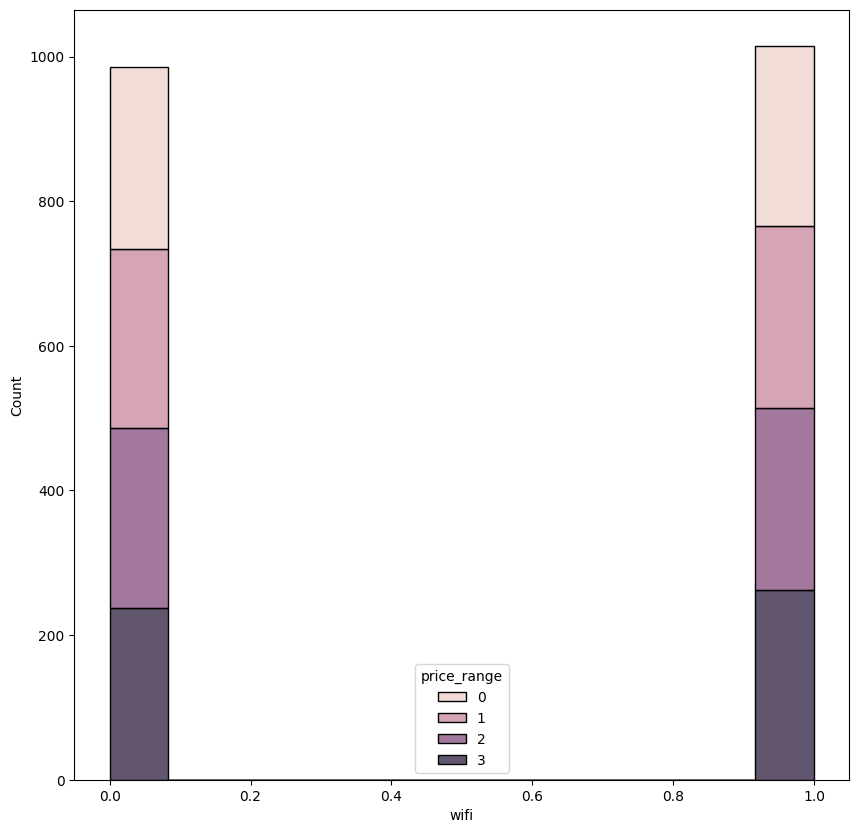

In [19]:
#Analysis with respect to target variable "price_range"

for i in train.columns[:-1]:
    plt.figure(figsize=(10,10))
    sns.histplot(x=train[i], hue=train["price_range"], multiple="stack")
    print("Distribution of ",i ,"with respect to price range")
    plt.show()

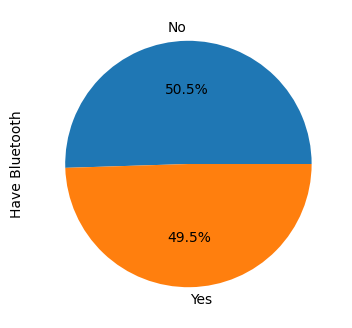

In [20]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
train['blue'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Have Bluetooth')
plt.show()

0    1010
1     990
Name: blue, dtype: int64


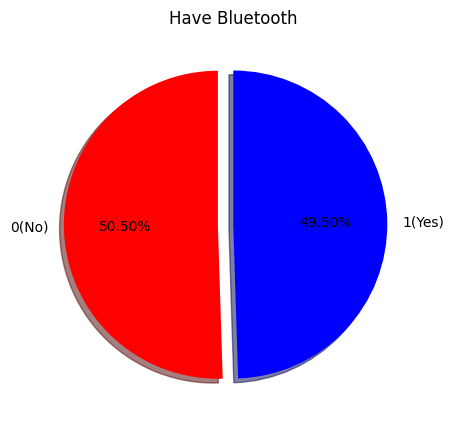

In [21]:
#Analysis based on Percentages using Pie Chart

#bluetooth devices

count=train["blue"].value_counts()
print(count)
cls_label=['0(No)','1(Yes)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=cls_label,startangle=90,colors=['red','blue'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Have Bluetooth")
plt.show()

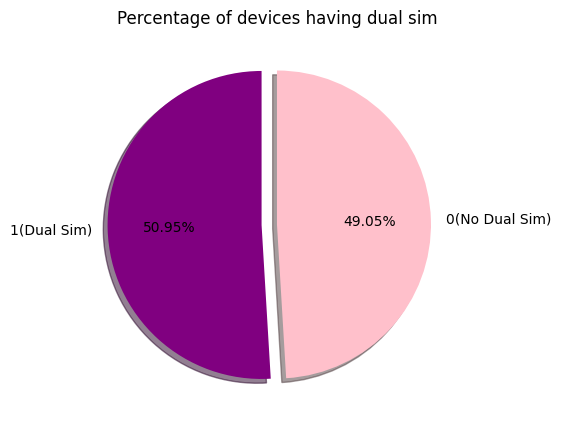

In [22]:
#dual sim

count=train["dual_sim"].value_counts()
label=['1(Dual Sim)','0(No Dual Sim)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,startangle=90,colors=['purple','pink'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having dual sim")
plt.show()

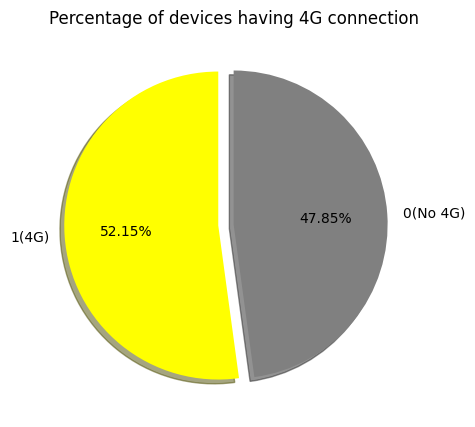

In [23]:
#4G
count=train["four_g"].value_counts()
label=['1(4G)','0(No 4G)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,startangle=90,colors=['yellow','grey'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having 4G connection")
plt.show()

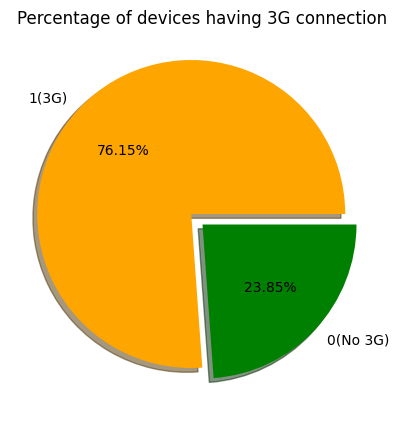

In [24]:
#3G

count=train["three_g"].value_counts()
label=['1(3G)','0(No 3G)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,colors=['orange','green'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having 3G connection")
plt.show()

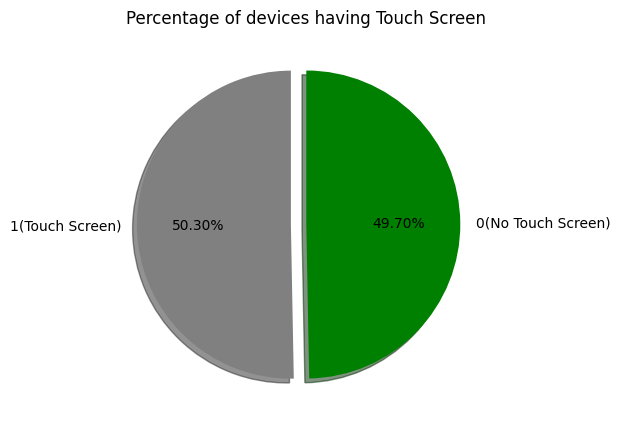

In [25]:
#Touch Screen
count=train["touch_screen"].value_counts()
cls_label=['1(Touch Screen)','0(No Touch Screen)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=cls_label,startangle=90,colors=['grey','green'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having Touch Screen")
plt.show()

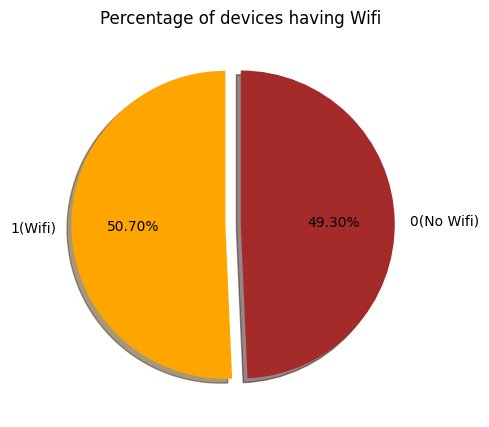

In [26]:
#Wifi
count=train["wifi"].value_counts()
label=['1(Wifi)','0(No Wifi)']
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,startangle=90,colors=['orange','brown'],autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.title("Percentage of devices having Wifi")
plt.show()

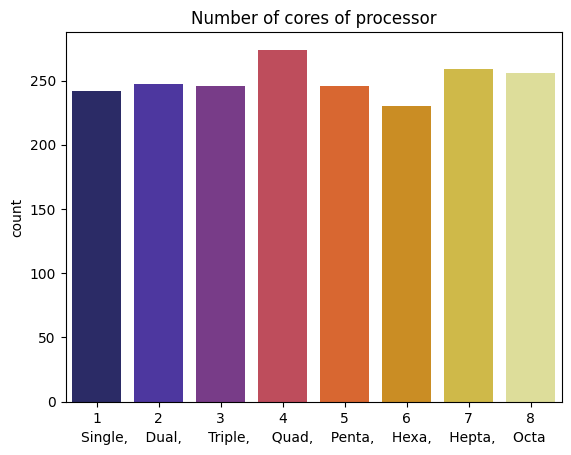

In [27]:
#Processors

sns.countplot(x='n_cores',data=train, palette='CMRmap')
plt.title("Number of cores of processor")
plt.xlabel('Single,    Dual,      Triple,     Quad,    Penta,    Hexa,    Hepta,    Octa')
plt.show()

* We can see that almost half of the phones have bluetooth, dual sim, 4G, touchscreen and wifi.
* Almost three-fourth of the phones have 3G.
* The different types of cores are also spread out almost evenly.

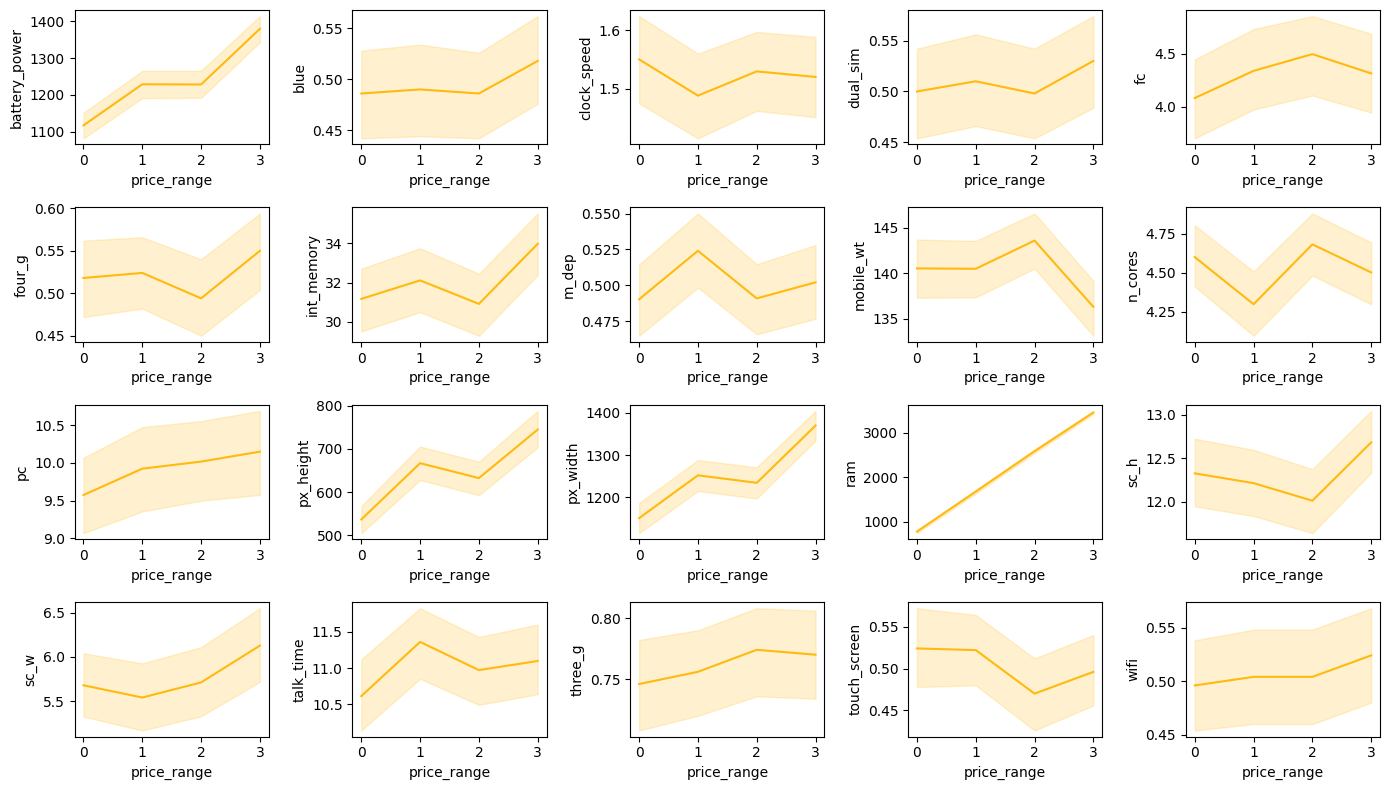

In [28]:
#Line plot for all columns
a=train.drop('price_range',axis=1)
plt.figure(figsize=(14,8))
for i, j in enumerate(a):
    plt.subplot(4,5, i+1)
    sns.lineplot(y=train[j],x=train["price_range"],color ='#FFB90F')
plt.tight_layout()

* The higher the price range higher the average ram size.
* We can see that the higher the price range it tend to have a higher battery power except on the price range 1 to 2. It seems that from price range 1 to 2 there's no significance difference in the average  battery power 
* Clock spped is highest for mobiles in lower price range.
* The price range of 0 has more products with lower pixel width and pixel height while the highest price range has more products with higher pixel width and pixel height.
* It seems that talk time doesn't really affect the price range.
* Higher price range has a higher megapixel primary camera.

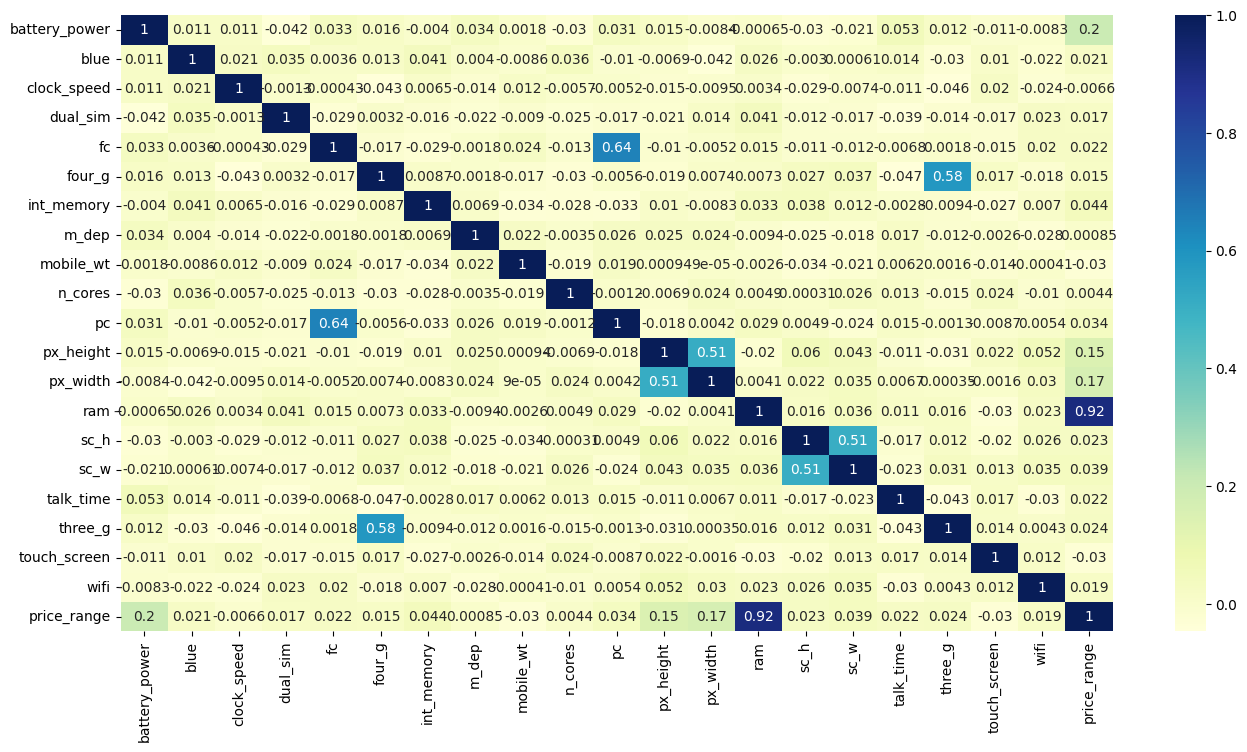

In [29]:
# Checking for multicollinearity
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()

* Almost all features exhibit low correlation with each other.
* 'ram' is highly correlated with price range.

## Preprocessing

### Missing Values Handling

In [30]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No missing values present in the dataset

### Outlier detection

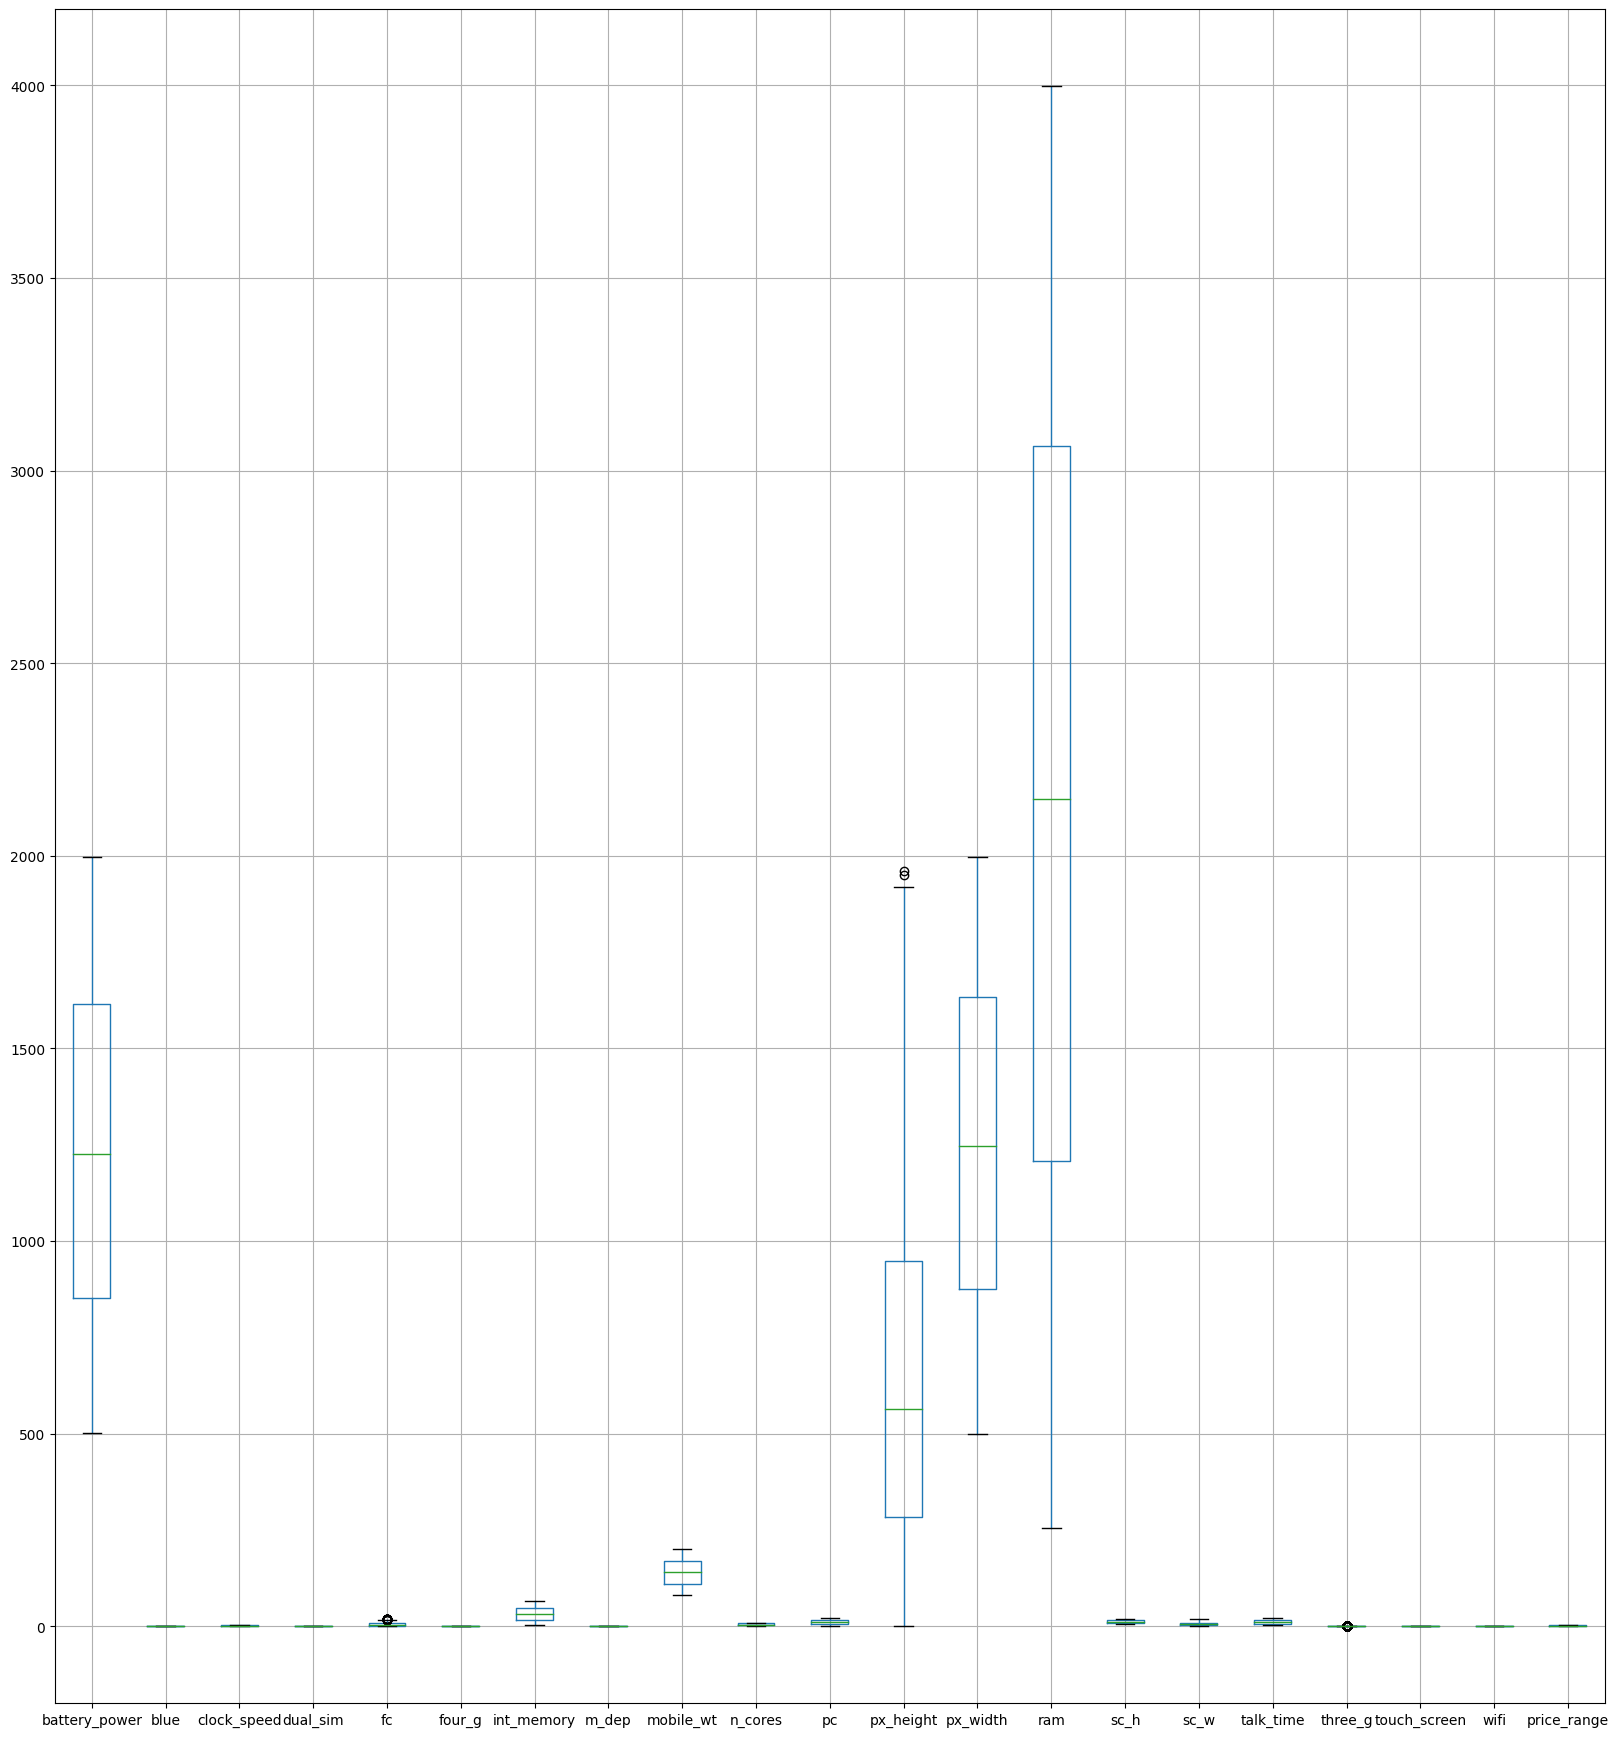

In [31]:
#boxplot of each column
train.boxplot(figsize=(20,22))
plt.show()

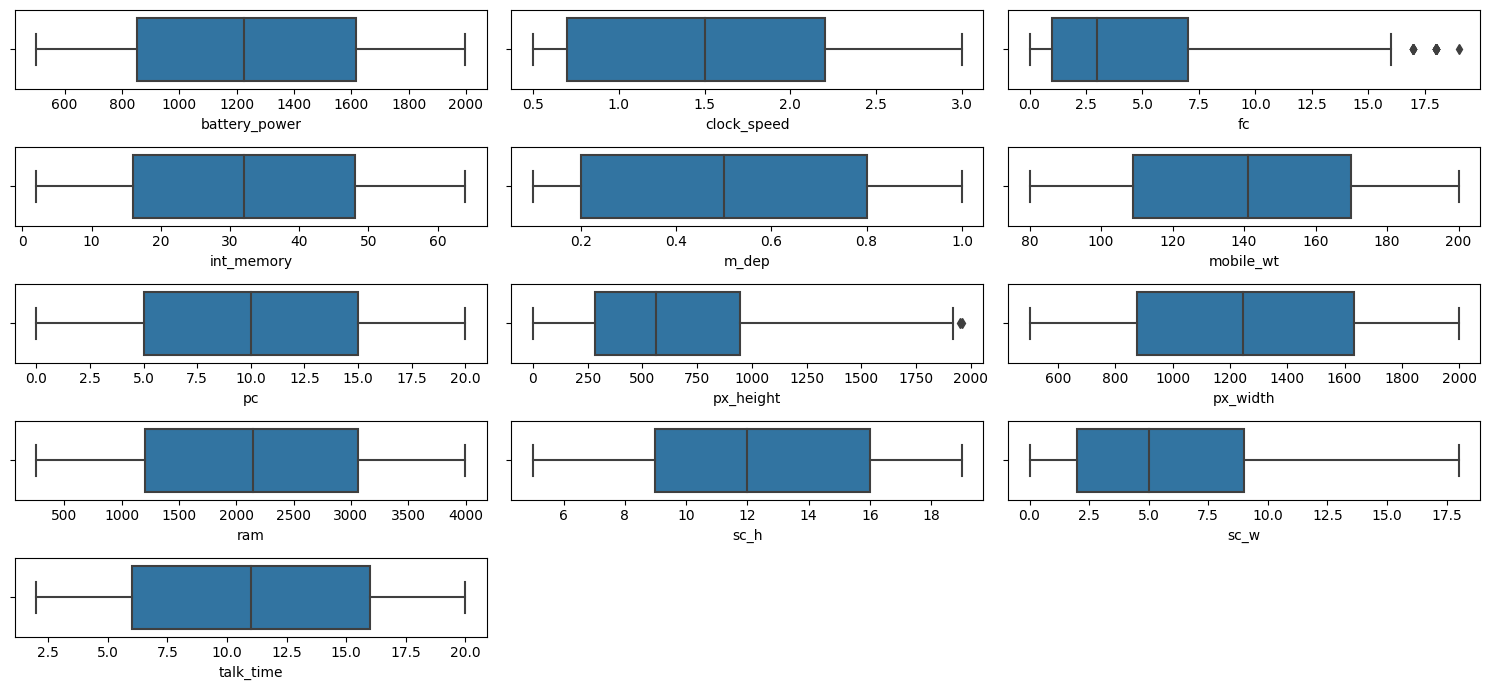

In [32]:

num_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=train[num_col[i]],orient='v')
    plt.tight_layout()


There are outliers in the columns 'fc' and 'px_height'. Since these are genuine values we need not replace or remove it.

#### Classify the datset into software and hardware

In [33]:
data1 = train.loc[:,['battery_power','blue','four_g','mobile_wt','n_cores','px_height','px_width','price_range','talk_time','three_g','wifi','clock_speed']]
data1.head()

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,wifi,clock_speed
0,842,0,0,188,2,20,756,1,19,0,1,2.2
1,1021,1,1,136,3,905,1988,2,7,1,0,0.5
2,563,1,1,145,5,1263,1716,2,9,1,0,0.5
3,615,1,0,131,6,1216,1786,2,11,1,0,2.5
4,1821,1,1,141,2,1208,1212,1,15,1,0,1.2


In [34]:
data2 =train.loc[:,['dual_sim','fc','m_dep','int_memory','pc','ram','sc_h','sc_w','touch_screen']]
data2.head()

,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,0,1,0.6,7,2,2549,9,7,0
1,1,0,0.7,53,6,2631,17,3,1
2,1,2,0.9,41,6,2603,11,2,1
3,0,0,0.8,10,9,2769,16,8,0
4,0,13,0.6,44,14,1411,8,2,1


In [35]:
# Merging the datasets
data3 = pd.concat([data1, data2], axis=1)
data3.head()

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,...,clock_speed,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,842,0,0,188,2,20,756,1,19,0,...,2.2,0,1,0.6,7,2,2549,9,7,0
1,1021,1,1,136,3,905,1988,2,7,1,...,0.5,1,0,0.7,53,6,2631,17,3,1
2,563,1,1,145,5,1263,1716,2,9,1,...,0.5,1,2,0.9,41,6,2603,11,2,1
3,615,1,0,131,6,1216,1786,2,11,1,...,2.5,0,0,0.8,10,9,2769,16,8,0
4,1821,1,1,141,2,1208,1212,1,15,1,...,1.2,0,13,0.6,44,14,1411,8,2,1


### Feature Scaling

In [36]:
# Min-max scaling
df = train.drop(['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],axis=1)
X = train.drop(['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range'], axis=1)
X

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [37]:
from sklearn.preprocessing import MinMaxScaler  #importing the required library for MinMax scaling
minmax = MinMaxScaler(feature_range=(0,1))  #creating instance
X= minmax.fit_transform(X)  #Performing MinMax scaling
X

array([[0.22778891, 0.68      , 0.05263158, ..., 0.28571429, 0.38888889,
        0.94444444],
       [0.34736139, 0.        , 0.        , ..., 0.85714286, 0.16666667,
        0.27777778],
       [0.04141617, 0.        , 0.10526316, ..., 0.42857143, 0.11111111,
        0.38888889],
       ...,
       [0.94188377, 0.16      , 0.05263158, ..., 0.28571429, 0.05555556,
        0.16666667],
       [0.6753507 , 0.16      , 0.21052632, ..., 0.92857143, 0.55555556,
        0.94444444],
       [0.00601202, 0.6       , 0.26315789, ..., 1.        , 0.22222222,
        0.        ]])

In [38]:
X = pd.DataFrame(X)         
X = pd.DataFrame(X)         
X.columns = ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'] # Giving the columns their respective names
X

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444
1996,0.977956,0.84,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778
1997,0.941884,0.16,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667
1998,0.675351,0.16,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444


In [39]:

df = pd.concat([df,X],axis = 1)

In [40]:
df.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range,battery_power,clock_speed,fc,...,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,0,0,0,0,1,1,0.227789,0.68,0.052632,...,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,1,1,1,1,1,0,2,0.347361,0.00,0.000000,...,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,1,1,1,1,1,0,2,0.041416,0.00,0.105263,...,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,1,0,0,1,0,0,2,0.076152,0.80,0.000000,...,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,1,0,1,1,1,0,1,0.881764,0.28,0.684211,...,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222


### splitting features and target

In [41]:
# Split the dataset into features and target
x = df.drop('price_range', axis=1)
y = df['price_range']

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size=0.25,random_state = 42)

## Modelling

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr = lr.fit(xtrain,ytrain)
ypred_lr = model_lr.predict(xtest)
# checking the validation of the model
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
print(classification_report(ytest,ypred_lr))
print('Accuracy score is:',accuracy_score(ytest,ypred_lr))
print('f1 score is:', f1_score(ytest, ypred_lr,average='weighted'))
al = accuracy_score(ytest,ypred_lr)
print(al)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       132
           1       0.86      0.90      0.88       118
           2       0.92      0.82      0.87       120
           3       0.93      0.98      0.95       130

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

Accuracy score is: 0.918
f1 score is: 0.917334898508308
0.918


### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
#creating an instance
dt_clf = DecisionTreeClassifier(random_state =42)
#fitting the model
dt_clf.fit(xtrain,ytrain)
ypred_dt = dt_clf.predict(xtest)
print(classification_report(ytest,ypred_dt))
print('Accuracy score is:',accuracy_score(ytest,ypred_dt))
print('f1 score is:', f1_score(ytest, ypred_dt,average='weighted'))
ad = accuracy_score(ytest,ypred_dt)
print(ad)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       132
           1       0.71      0.77      0.74       118
           2       0.75      0.68      0.72       120
           3       0.85      0.88      0.87       130

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500

Accuracy score is: 0.8
f1 score is: 0.7997571677825621
0.8


### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(xtrain,ytrain)
ypred_random = rf_clf.predict(xtest)
print(classification_report(ytest,ypred_random))
print('Accuracy score is:',accuracy_score(ytest,ypred_random))
print('f1 score is:', f1_score(ytest, ypred_random,average='weighted'))
ar = accuracy_score(ytest,ypred_random)
print(ar)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       132
           1       0.84      0.86      0.85       118
           2       0.82      0.78      0.80       120
           3       0.90      0.90      0.90       130

    accuracy                           0.88       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.88      0.88      0.88       500

Accuracy score is: 0.876
f1 score is: 0.8753565221584607
0.876


### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
metric_k= []
neighbors = np.arange(3, 15)

for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  model_knn =knn.fit(xtrain,ytrain)
  y_pred_knn = model_knn.predict(xtest)
  acc=accuracy_score(ytest,y_pred_knn)
  metric_k.append(acc)
# accuracy array
metric_k 

[0.374, 0.38, 0.414, 0.42, 0.426, 0.416, 0.44, 0.424, 0.42, 0.436, 0.47, 0.464]

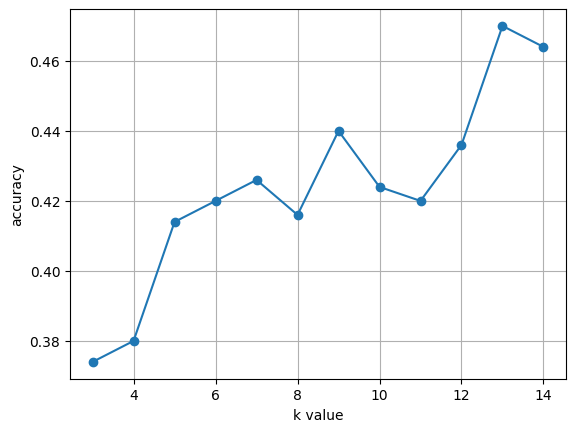

In [47]:
#plotting the accuracy for each k value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [48]:
# accuracy is more when k=13 so we can create model using k = 13
knn = KNeighborsClassifier(n_neighbors=13)
model_knn = knn.fit(xtrain,ytrain)
y_pred_knn = model_knn.predict(xtest)
print(classification_report(ytest,y_pred_knn))
print('Accuracy score is:',accuracy_score(ytest,y_pred_knn))
print('f1 score is:', f1_score(ytest, y_pred_knn,average='weighted'))
ak = accuracy_score(ytest,y_pred_knn)
print(ak)

              precision    recall  f1-score   support

           0       0.61      0.66      0.64       132
           1       0.32      0.37      0.35       118
           2       0.36      0.40      0.38       120
           3       0.65      0.43      0.52       130

    accuracy                           0.47       500
   macro avg       0.49      0.47      0.47       500
weighted avg       0.49      0.47      0.47       500

Accuracy score is: 0.47
f1 score is: 0.4742605282826838
0.47


### Gradient Boost Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
# Define the gradient boosting classifier model
gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model=gb.fit(xtrain, ytrain)
y_pred_gb = gb_model.predict(xtest)
print(classification_report(ytest,y_pred_gb))
print('Accuracy score is:',accuracy_score(ytest,y_pred_gb))
print('f1 score is:', f1_score(ytest, y_pred_gb,average='weighted'))
ag = accuracy_score(ytest,y_pred_gb)
print(ag)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       132
           1       0.84      0.87      0.85       118
           2       0.84      0.82      0.83       120
           3       0.92      0.92      0.92       130

    accuracy                           0.89       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.89      0.89       500

Accuracy score is: 0.886
f1 score is: 0.8859835361938733
0.886


### Choosing Best Model 

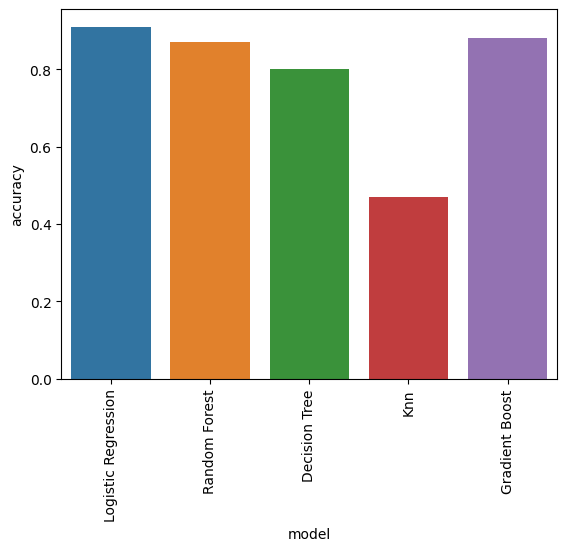

In [50]:
classifiers=["Logistic Regression","Random Forest","Decision Tree","Knn","Gradient Boost"]
# accuracy = [al,ar,ad,ak,ag]
accuracy = [0.91,0.87,0.80,0.47,0.88]
f1_score = [0.91,0.86,0.80,0.47,0.88]
df_af=pd.DataFrame({'model':classifiers,"accuracy":accuracy,"f1-score":f1_score})
sns.barplot(data=df_af,x="model",y="accuracy")
plt.xticks(rotation ='vertical')
plt.show()

### Logistic Regression is the best model

We need to identify the most important features and rank the features based on their importance scores.We could Identify the most important features using feature selection techniques such as correlation analysis, mutual information, and feature importance scores from machine learning models.

### Identifying important features and ranking them
#### Logistic Regression Model

Logistic regression does not have an attribute for ranking feature. If you want to visualize the coefficients that you 
can use to show feature importance.

After the model is fitted, the coefficients are stored in the coef_ property.

The following code trains the logistic regression model, creates a data frame in which the attributes are stored with their respective coefficients, and sorts that data frame by the coefficient in descending order:

In [51]:
importance_scores_lr = pd.DataFrame(data ={
    'Attribute': xtrain.columns,
    'Importance': np.abs(model_lr.coef_[0])
})

importance_scores_lr = importance_scores_lr.sort_values(by='Importance', ascending=False)

In [52]:
# Create a DataFrame to store the feature names and their importance scores
feature_scores = pd.DataFrame({'Feature': x.columns,'Importance': np.abs(model_lr.coef_[0])})

# Sort the features based on their importance scores in descending order
feature_scores = feature_scores.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
16     1            ram   13.750098
6      2  battery_power    3.283383
14     3      px_height    2.501970
15     4       px_width    1.942011
11     5      mobile_wt    0.466854
9      6     int_memory    0.266778
7      7    clock_speed    0.241827
8      8             fc    0.153247
4      9   touch_screen    0.122276
3     10        three_g    0.106527
19    11      talk_time    0.097583
18    12           sc_w    0.064259
2     13         four_g    0.062252
1     14       dual_sim    0.060494
17    15           sc_h    0.039547
10    16          m_dep    0.038169
13    17             pc    0.036586
0     18           blue    0.033485
5     19           wifi    0.016101
12    20        n_cores    0.006754


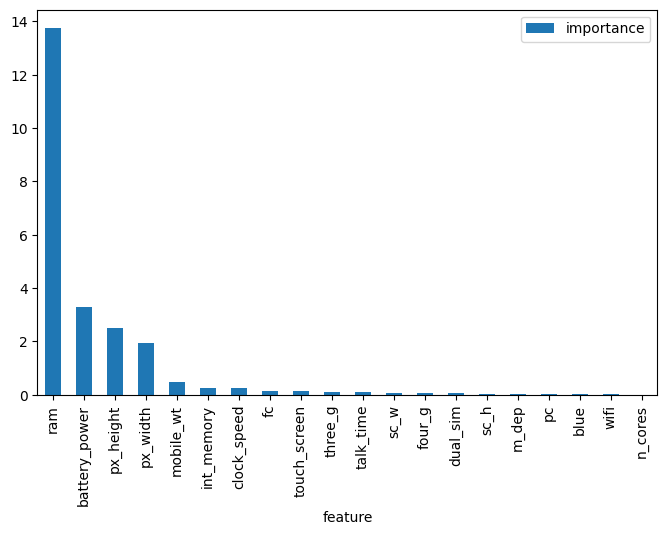

In [53]:
importance_scores_lr = pd.DataFrame({'feature': x.columns, 'importance': np.abs(model_lr.coef_[0])})
importance_scores_lr = importance_scores_lr.sort_values('importance',ascending=False)
importance_scores_lr.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

#### Gradient Boost Model

In [54]:
# Compute the feature importance scores using a machine learning model
importance_scores_gb = gb_model.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_scores_gb = pd.DataFrame({'Feature': x.columns, 'Importance': importance_scores_gb})

# Sort the features based on their importance scores in descending order
feature_scores_gb = feature_scores_gb.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores_gb['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores_gb[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
16     1            ram    0.786266
6      2  battery_power    0.113054
14     3      px_height    0.057315
15     4       px_width    0.023551
11     5      mobile_wt    0.005170
9      6     int_memory    0.004653
10     7          m_dep    0.003085
8      8             fc    0.001682
17     9           sc_h    0.001204
18    10           sc_w    0.000903
19    11      talk_time    0.000897
12    12        n_cores    0.000617
5     13           wifi    0.000441
13    14             pc    0.000398
2     15         four_g    0.000299
7     16    clock_speed    0.000261
4     17   touch_screen    0.000108
0     18           blue    0.000072
1     19       dual_sim    0.000015
3     20        three_g    0.000008


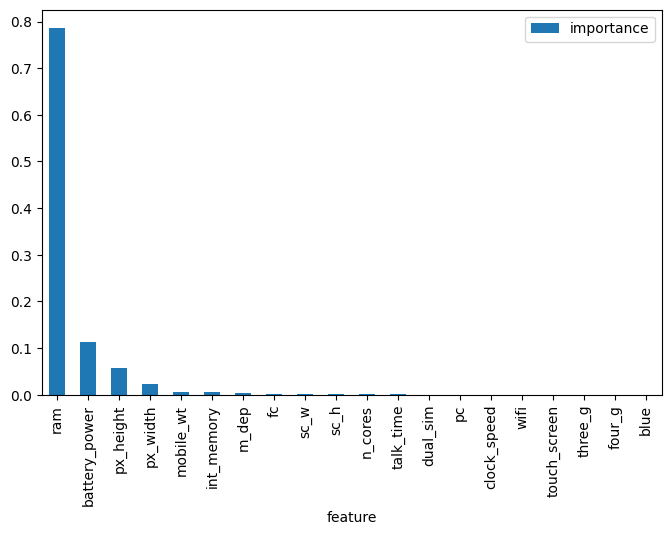

In [55]:
# Plotting features according to its importance
importance_scores_gb = pd.DataFrame({'feature': x.columns, 'importance': np.round(gb_model.feature_importances_,3)})
importance_scores_gb = importance_scores_gb.sort_values('importance',ascending=False)
importance_scores_gb.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

#### Random Forest Model

In [56]:
# Compute the feature importance scores using a machine learning model
importance_scores_rf = rf_clf.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_scores_rf = pd.DataFrame({'Feature': x.columns, 'Importance': importance_scores_rf})

# Sort the features based on their importance scores in descending order
feature_scores_rf = feature_scores_rf.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores_rf['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores_rf[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
16     1            ram    0.476141
6      2  battery_power    0.076673
14     3      px_height    0.056284
15     4       px_width    0.055536
11     5      mobile_wt    0.040477
9      6     int_memory    0.038033
19     7      talk_time    0.030457
7      8    clock_speed    0.030046
18     9           sc_w    0.028197
13    10             pc    0.027674
17    11           sc_h    0.027550
10    12          m_dep    0.025530
8     13             fc    0.024048
12    14        n_cores    0.023242
2     15         four_g    0.007075
0     16           blue    0.006906
4     17   touch_screen    0.006623
1     18       dual_sim    0.006619
5     19           wifi    0.006592
3     20        three_g    0.006296


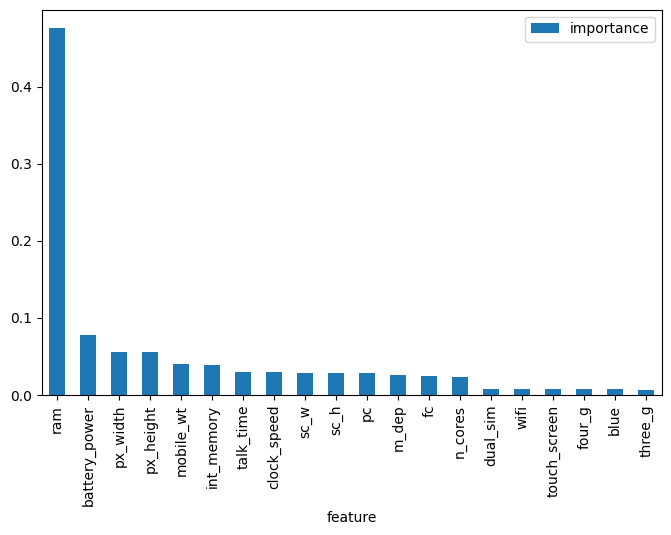

In [57]:
# Plotting features according to its importance
importance_scores_rf = pd.DataFrame({'feature': x.columns, 'importance': np.round(rf_clf.feature_importances_,3)})
importance_scores_rf = importance_scores_rf.sort_values('importance',ascending=False)
importance_scores_rf.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

#### Decision Tree Classifier

In [58]:
# Compute the feature importance scores using a machine learning model
importance_scores_dt = dt_clf.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_scores_dt= pd.DataFrame({'Feature': x.columns, 'Importance': importance_scores_dt})

# Sort the features based on their importance scores in descending order
feature_scores_dt = feature_scores_dt.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores_dt['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores_dt[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
16     1            ram    0.616048
6      2  battery_power    0.133173
14     3      px_height    0.087074
15     4       px_width    0.064284
11     5      mobile_wt    0.020363
19     6      talk_time    0.013809
9      7     int_memory    0.010588
10     8          m_dep    0.010520
12     9        n_cores    0.009640
13    10             pc    0.008522
7     11    clock_speed    0.007273
8     12             fc    0.006852
18    13           sc_w    0.006471
17    14           sc_h    0.004197
5     15           wifi    0.001185
1     16       dual_sim    0.000000
4     17   touch_screen    0.000000
3     18        three_g    0.000000
2     19         four_g    0.000000
0     20           blue    0.000000


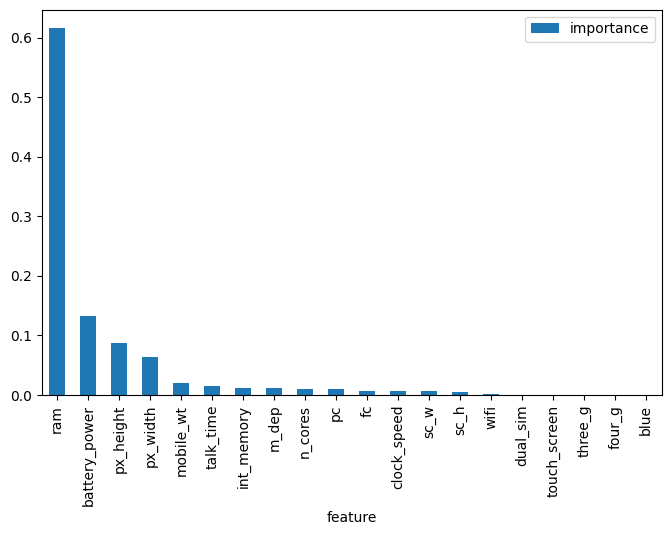

In [59]:
# Plotting features according to its importance
importance_scores_dt = pd.DataFrame({'feature': x.columns, 'importance': np.round(dt_clf.feature_importances_,3)})
importance_scores_dt = importance_scores_dt.sort_values('importance',ascending=False)
importance_scores_dt.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

### Ranking of features of smartphone

In [60]:
#Ranking dataset according to price range

train["rank_by_price"]=train["price_range"].rank()
df1=train
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [61]:
df1["rank_by_price"]=df1["rank_by_price"].sort_values()
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [62]:
#Sorting above dataset according to ranked_price_range

df1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [63]:
#Ranking on all the features using rank()

RankedData = df1.rank()
RankedData.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [64]:
#Ranking all the features separately to correct output
#Because not all features are good when values are high or low
#It depends on each and every feature.
r= df1
r["rank_by_price"] = r["price_range"].rank()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False)
r["rank_by_blueooth"] = r["blue"].rank(ascending=False)
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False)
r["rank_by_fc"] = r["fc"].rank(ascending=False)
r["rank_by_4G"] = r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False)
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False)
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=True)
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False)
r["rank_by_pc"] = r["pc"].rank(ascending=False)
r["rank_by_height"] = r["px_height"].rank(ascending=False)
r["rank_by_width"] = r["px_width"].rank(ascending=False)
r["rank_by_ram"] = r["ram"].rank(ascending=False)
r["rank_by_sch"] = r["sc_h"].rank(ascending=False)
r["rank_by_scw"] = r["sc_w"].rank(ascending=False)
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False)
r["rank_by_3G"] = r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"] = r["wifi"].rank(ascending=False)
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [65]:
RankedData = r.iloc[:,21:]
RankedData

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5


### Loading Test Dataset

In [66]:
test = pd.read_csv(r"C:\Users\jubie\Downloads\MobileTest.csv")
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [67]:
test.shape

(1000, 21)

In [68]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [70]:
#Checking for null values
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

No null values present in the test dataset

In [71]:
# Min-max scaling
df_test1 = test.drop(['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],axis=1)
Y = test.drop(['id','blue','dual_sim','four_g','three_g','touch_screen','wifi'], axis=1)
Y

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1043,1.8,14,5,0.1,193,3,16,226,1412,3476,12,7,2
1,841,0.5,4,61,0.8,191,5,12,746,857,3895,6,0,7
2,1807,2.8,1,27,0.9,186,3,4,1270,1366,2396,17,10,10
3,1546,0.5,18,25,0.5,96,8,20,295,1752,3893,10,0,7
4,1434,1.4,11,49,0.5,108,6,18,749,810,1773,15,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1.9,0,54,0.5,170,7,17,644,913,2121,14,8,15
996,609,1.8,0,13,0.9,186,4,2,1152,1632,1933,8,1,19
997,1185,1.4,1,8,0.5,80,1,12,477,825,1223,5,0,14
998,1533,0.5,0,50,0.4,171,2,12,38,832,2509,15,11,6


In [72]:
from sklearn.preprocessing import MinMaxScaler  #importing the required library for MinMax scaling
minmax = MinMaxScaler(feature_range=(0,1))  #creating instance
Y = minmax.fit_transform(Y)  #Performing MinMax scaling
Y

array([[0.36224149, 0.52      , 0.73684211, ..., 0.5       , 0.38888889,
        0.        ],
       [0.22748499, 0.        , 0.21052632, ..., 0.07142857, 0.        ,
        0.27777778],
       [0.87191461, 0.92      , 0.05263158, ..., 0.85714286, 0.55555556,
        0.44444444],
       ...,
       [0.45697131, 0.36      , 0.05263158, ..., 0.        , 0.        ,
        0.66666667],
       [0.68912608, 0.        , 0.        , ..., 0.71428571, 0.61111111,
        0.22222222],
       [0.51367578, 0.        , 0.21052632, ..., 0.28571429, 0.11111111,
        0.05555556]])

In [73]:
Y = pd.DataFrame(Y)         
Y.columns = ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time'] # Giving the columns their respective names
Y

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.362241,0.52,0.736842,0.048387,0.000000,0.941667,0.285714,0.80,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000
1,0.227485,0.00,0.210526,0.951613,0.777778,0.925000,0.571429,0.60,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778
2,0.871915,0.92,0.052632,0.403226,0.888889,0.883333,0.285714,0.20,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444
3,0.697799,0.00,0.947368,0.370968,0.444444,0.133333,1.000000,1.00,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778
4,0.623082,0.36,0.578947,0.758065,0.444444,0.233333,0.714286,0.90,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800534,0.56,0.000000,0.838710,0.444444,0.750000,0.857143,0.85,0.337703,0.275217,0.498658,0.642857,0.444444,0.722222
996,0.072715,0.52,0.000000,0.177419,0.888889,0.883333,0.428571,0.10,0.604090,0.755511,0.448202,0.214286,0.055556,0.944444
997,0.456971,0.36,0.052632,0.096774,0.444444,0.000000,0.000000,0.60,0.250131,0.216433,0.257649,0.000000,0.000000,0.666667
998,0.689126,0.00,0.000000,0.774194,0.333333,0.758333,0.142857,0.60,0.019927,0.221109,0.602791,0.714286,0.611111,0.222222


In [74]:
df_test = Y
df_test = pd.concat([df_test1,df_test],axis = 1)


In [75]:
df_test

,id,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power,clock_speed,fc,...,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1,1,1,0,0,1,0,0.362241,0.52,0.736842,...,0.000000,0.941667,0.285714,0.80,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000
1,2,1,1,1,1,0,0,0.227485,0.00,0.210526,...,0.777778,0.925000,0.571429,0.60,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778
2,3,1,0,0,0,1,1,0.871915,0.92,0.052632,...,0.888889,0.883333,0.285714,0.20,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444
3,4,0,1,1,1,1,0,0.697799,0.00,0.947368,...,0.444444,0.133333,1.000000,1.00,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778
4,5,0,0,1,1,0,1,0.623082,0.36,0.578947,...,0.444444,0.233333,0.714286,0.90,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,0,1,1,1,0,0.800534,0.56,0.000000,...,0.444444,0.750000,0.857143,0.85,0.337703,0.275217,0.498658,0.642857,0.444444,0.722222
996,997,0,1,0,0,1,1,0.072715,0.52,0.000000,...,0.888889,0.883333,0.428571,0.10,0.604090,0.755511,0.448202,0.214286,0.055556,0.944444
997,998,0,0,1,1,0,0,0.456971,0.36,0.052632,...,0.444444,0.000000,0.000000,0.60,0.250131,0.216433,0.257649,0.000000,0.000000,0.666667
998,999,1,1,0,0,1,0,0.689126,0.00,0.000000,...,0.333333,0.758333,0.142857,0.60,0.019927,0.221109,0.602791,0.714286,0.611111,0.222222


### Prediction Using Test Data with Logistic Regression Model

In [76]:
df_test =df_test.drop('id', axis=1)

In [77]:
ypred_lr = model_lr.predict(df_test)
result =pd.DataFrame(ypred_lr)
print(result)

     0
0    2
1    3
2    2
3    3
4    1
..  ..
995  2
996  1
997  0
998  2
999  2

[1000 rows x 1 columns]
